# Overview

The data is a bank card transaction and user loyalty analysis dataset
provided by a bank in Brazil. This project aims to practice on topics such as data quality analysis, statistical analysis, and regression
analysis given the dataset. The overall purpose of the analysis is to predict a
loyalty score for each card id represented in userscore.csv. The dataset contains four files.

userscore.csv: 
contain card ids and information about the card itself - the
first month the card was active. It also contains the predict/analysis target,
i.e., score, which is a score calculated by the bank, indicating the loyalty of
each card owner. Three features are provided, all of which are anonymized card
categorical features.

merchants.csv : 
contains aggregate information for each merchant id represented in the data set. merchants can be joined with the transaction sets to provide additional merchant-level information.

The historical transactions.csv and new merchant transactions.csv files : 
contain information about each card’s transactions. historical transactions.csv contains up to 3 months’ worth of transactions for every card at any of the provided
merchant ids. new merchant transactions.csv contains the transactions at new
merchants (merchant ids that this particular card id has not yet visited) over
two months.

# Import the required libraries 

In [ ]:
# import the required libraries
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import norm
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
# !pip install missingno
import missingno as msno
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
# !pip install category_encoders 
# !conda install -c conda-forge/label/gcc7 missing

# Read data

In [ ]:
# read historical transactions csv file 
historical_transactions=pd.read_csv('historical_transactions.csv')

In [ ]:
# read new merchant transactions csv file
new_merchant_transactions=pd.read_csv('new_merchant_transactions.csv')

In [ ]:
# read userscore csv file
userscore=pd.read_csv('userscore.csv')

In [ ]:
# read merchants csv file
merchants=pd.read_csv('merchants.csv') 

# Question : 1

**Explore historical transactions table**

In [ ]:
# explore historical transactions table and show a part of table  
historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


<Axes: xlabel='authorized_flag', ylabel='count'>

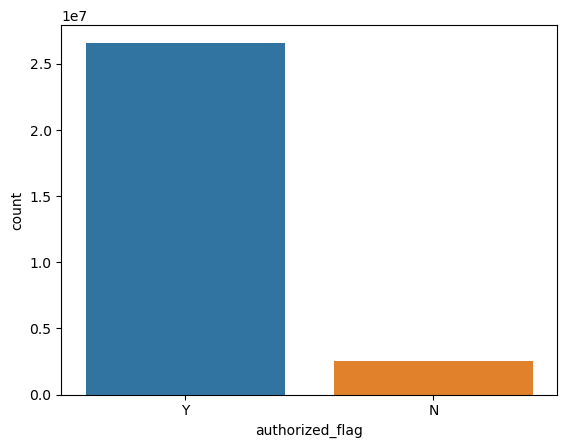

In [ ]:
# use countplot to indicates the number of transaction that approved (Y) and the number of transaction that denied (N)
sns.countplot(x="authorized_flag",data=historical_transactions)

from this plot we detect that the number of transcations that  denied is very small according to the number of transcations that accepted

**historical transactions.csv contains up to 3 months worth of transactions for every card at any of the provided merchant ids**

- get summary of statistical properites of historical transactions.csv

In [ ]:
historical_transactions.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640090e-02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01


1- 'count' : describe the number of non-empty values for each column

2- 'mean' : the average value in each column 

3- 'std ' : the spreed of data 

4- min : the minimum value in column 

5- max : the maximum value in column 

6- 25% : the 25th percentile of values in column 

7- 50% :the 50th percentile of values in column  (called median)

8- 75% : the 75th percentile of values in column

In [ ]:
# explore historical transactions using .info() to know  the datatypes for each feature and the number of entries
historical_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


In [ ]:
# explore historical transactions file 
historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [ ]:
# Count the number of negative numbers and positive numbers in installments in historical transactions
negative_count = len(historical_transactions[historical_transactions['installments'] < 0])
postive_count = len(historical_transactions[historical_transactions['installments'] > 0])
# Print the count
print('Number of negative numbers:', negative_count)
print('Number of positive numbers:', postive_count)

Number of negative numbers: 178159
Number of positive numbers: 13522455


A negative numbers  may represent missing information , so that i will replace negative value with (0) in preprocessing on data

In [ ]:
# represent the count of each value in "category_1"
historical_transactions["category_1"].value_counts()

category_1
N    27028332
Y     2084029
Name: count, dtype: int64

<Axes: xlabel='category_1', ylabel='count'>

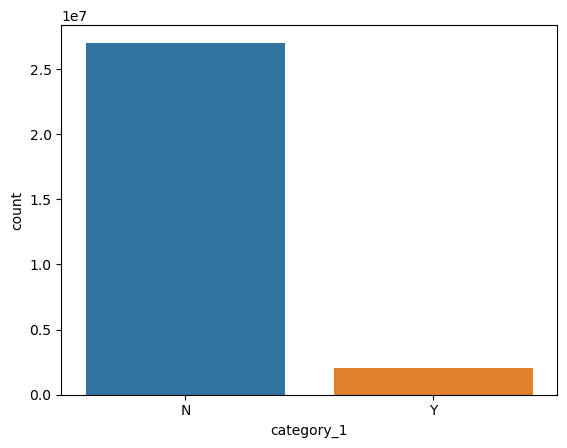

In [ ]:
# plot using countplot
sns.countplot(x="category_1",data=historical_transactions)

In [ ]:
# represent the count of each value in "category_3"
historical_transactions["category_3"].value_counts()

category_3
A    15411747
B    11677522
C     1844933
Name: count, dtype: int64

<Axes: xlabel='category_3', ylabel='count'>

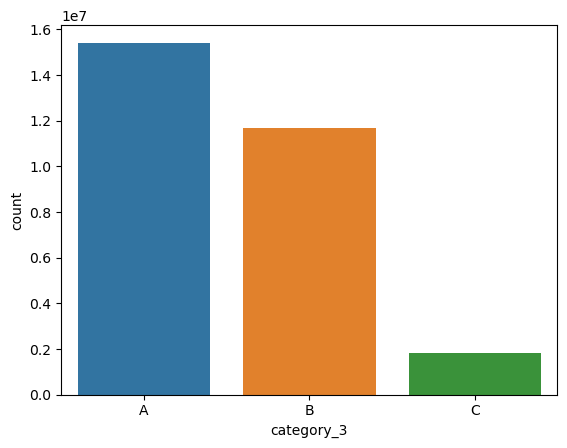

In [ ]:
# plot using countplot
sns.countplot(x="category_3",data=historical_transactions)

In [ ]:
# represent the count of each value in "installments"
historical_transactions["installments"].value_counts()

installments
 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: count, dtype: int64

<Axes: xlabel='installments', ylabel='count'>

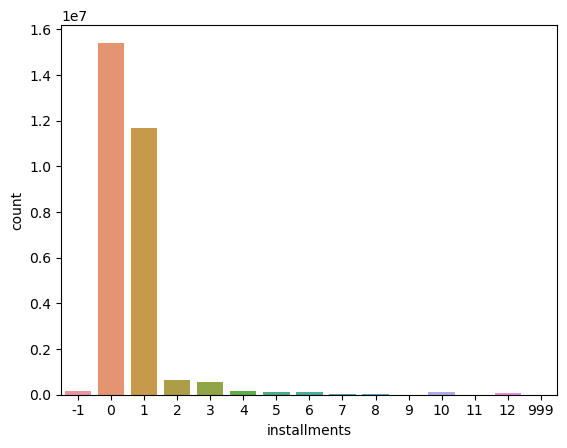

In [ ]:
# plot using countplot
sns.countplot(x="installments",data=historical_transactions)

it is not logical to get the numner of "installments" is 999 , so that i will handle it in preprocessing

**Explore new merchant transactions**

In [ ]:
# explore new merchant transactions file and show a part of table  
new_merchant_transactions.head() 

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


**new merchant transactions.csv contains the transactions at new merchants**

- get summary of statistical properites of new merchant transactions.csv

In [ ]:
new_merchant_transactions.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.851286e+06,1.963031e+06,1.963031e+06
mean,1.343867e+02,6.829643e-01,4.309701e+02,1.476515e+00,-5.509690e-01,2.197841e+00,1.088067e+01,2.597624e+01
std,1.015152e+02,1.584069e+00,2.463385e+02,4.994483e-01,6.940043e-01,1.528125e+00,6.038542e+00,1.012908e+01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-7.468928e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,6.900000e+01,0.000000e+00,2.780000e+02,1.000000e+00,-7.166294e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,1.100000e+02,1.000000e+00,3.670000e+02,1.000000e+00,-6.748406e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,6.830000e+02,2.000000e+00,-5.816162e-01,3.000000e+00,1.500000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,2.631575e+02,5.000000e+00,2.400000e+01,4.100000e+01


In [ ]:
# explore new merchant transactions file using .info() to know  the datatypes for each feature and the number of entries
new_merchant_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 209.7+ MB


In [ ]:
# explore new merchant transactions file 
new_merchant_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [ ]:
# Count the number of negative number and positive number in installments in new merchant transactions
negative_count = len(new_merchant_transactions[new_merchant_transactions['installments'] < 0])
postive_count = len(new_merchant_transactions[new_merchant_transactions['installments'] > 0])
# Print the count
print('Number of negative numbers:', negative_count)
print('Number of positive numbers:', postive_count)

Number of negative numbers: 55922
Number of positive numbers: 984865


A negative number may represent missing information , so that i will replace negative value with (0) in preprocessing 

**Notice** 

 the previous two table have the same features so that, I will make concatination between two tables vertically

In [ ]:
# represent the count of each value in "category_1"
new_merchant_transactions["category_1"].value_counts()

category_1
N    1899935
Y      63096
Name: count, dtype: int64

<Axes: xlabel='category_1', ylabel='count'>

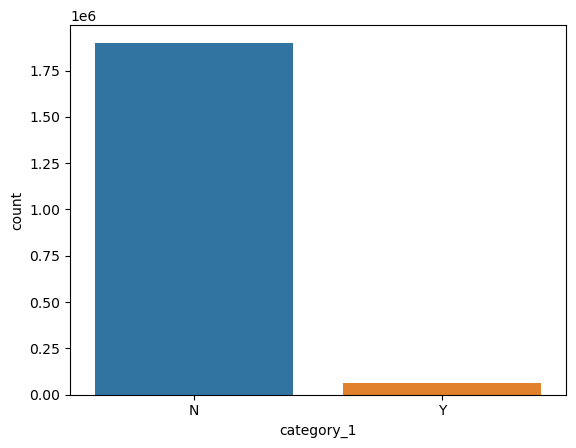

In [ ]:
# plot using countplot
sns.countplot(x="category_1",data=new_merchant_transactions)

In [ ]:
# represent the number of each value in "category_3"
new_merchant_transactions["category_3"].value_counts()

category_3
A    922244
B    836178
C    148687
Name: count, dtype: int64

<Axes: xlabel='category_3', ylabel='count'>

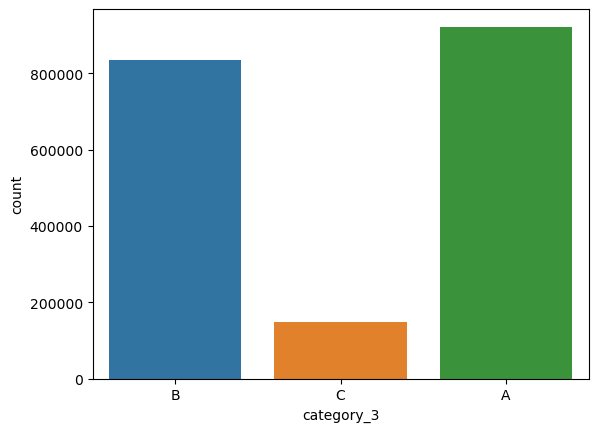

In [ ]:
# plot using countplot
sns.countplot(x="category_3",data=new_merchant_transactions)

In [ ]:
# represent the number of each value in "installments"
new_merchant_transactions["installments"].value_counts()

installments
 0      922244
 1      836178
-1       55922
 2       54729
 3       44750
 4       14815
 6       10389
 5        9296
 10       8899
 12       2850
 8        1555
 7         863
 9         478
 11         61
 999         2
Name: count, dtype: int64

<Axes: xlabel='installments', ylabel='count'>

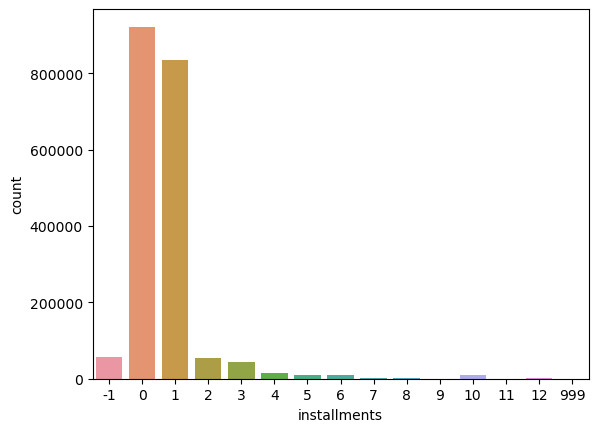

In [ ]:
# plot using countplot
sns.countplot(x="installments",data=new_merchant_transactions)

it is not logical to get the numper of "installments" is 999 , so that i will handle it in preprocessing

**Explore userscore**

In [ ]:
# explore userscore file and show a part of table  
userscore.head()

,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283
1,C_ID_3d0044924f,Jan-17,4,1,0,0.392913
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688056
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142495
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.159749


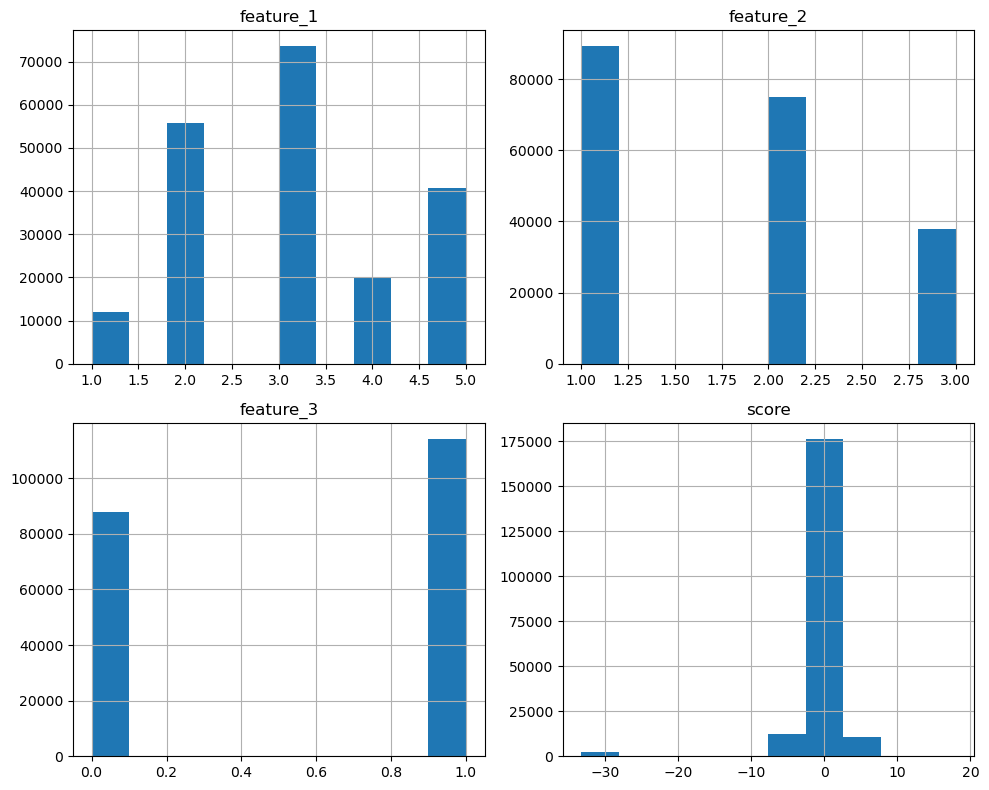

In [ ]:
# Histograms of numerical columns
userscore.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [ ]:
# get the range of score 
print("the minumun number in score is ", np.min(userscore["score"]))
print("the maxiumum number in score is ", np.max(userscore["score"]))

the minumun number in score is  -33.21928095
the maxiumum number in score is  17.9650684


In [ ]:
# Count the number of negative numbers and positive number in score 
postive_count_score = len(userscore[userscore['score'] > 0])
negative_count_score = len(userscore[userscore['score'] < 0])
equalzero_count_score = len(userscore[userscore['score'] == 0])
# Print the count
print('Number of negative numbers:', negative_count_score)
print('Number of positive numbers:', postive_count_score)
print(equalzero_count_score)

Number of negative numbers: 102678
Number of positive numbers: 97609
1630


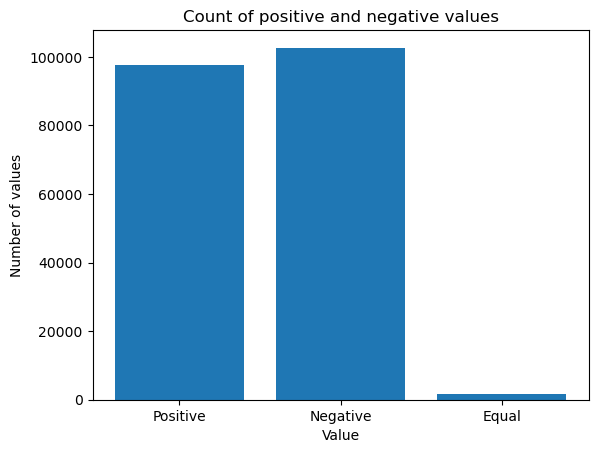

In [ ]:
# Plot the count of "Positive", "Negative" and "Equal" in userscore table  
plt.bar(["Positive", "Negative","Equal"], [postive_count_score, negative_count_score,equalzero_count_score])
plt.xlabel("Value")
plt.ylabel("Number of values")
plt.title("Count of positive and negative values")
plt.show()

negative score may represent the client is a bad client , because may not use the the card 

**userscore.csv contains information about card and the score of each card**

- get summary of statistical properites of userscore.csv

In [ ]:
userscore.describe()

,feature_1,feature_2,feature_3,score
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


In [ ]:
# explore userscore file using .info() to know  the datatypes for each features and the number of entries
userscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   card_id             201917 non-null  object 
 1   first_active_month  201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   score               201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [ ]:
# explore userscore file 
userscore.head()

,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283
1,C_ID_3d0044924f,Jan-17,4,1,0,0.392913
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688056
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142495
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.159749


**I will Merge userscore table with the result of concating  historical transactions file  and new merchant transactions file**

**Explore merchants**

In [ ]:
# explore merchants file 
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


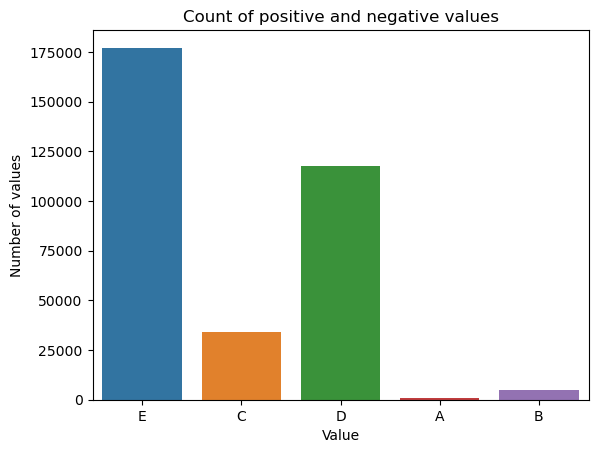

In [ ]:
# Plot the count of each category in "most_recent_sales_range" 
sns.countplot(x="most_recent_sales_range",data=merchants)
plt.xlabel("Value")
plt.ylabel("Number of values")
plt.title("Count of positive and negative values")
plt.show()

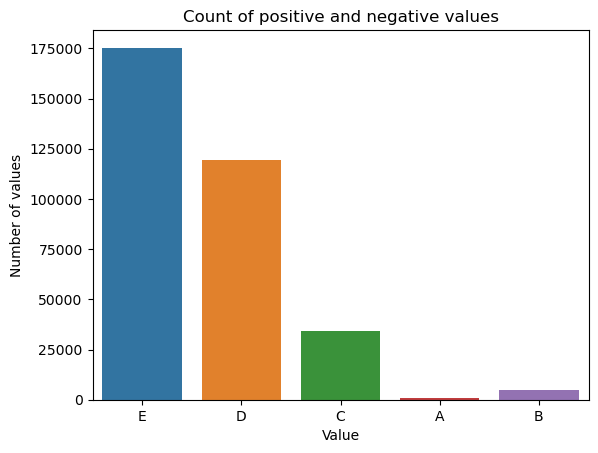

In [ ]:
# Plot the count of each category in "most_recent_purchases_range" 
sns.countplot(x="most_recent_purchases_range",data=merchants)
plt.xlabel("Value")
plt.ylabel("Number of values")
plt.title("Count of positive and negative values")
plt.show()

category "most_recent_sales_range",category "most_recent_purchases_range" have a small values of categorical (A) ,(B)

**merchants.csv contains aggregate information for each merchant id**

- get summary of statistical properites of merchants.csv

In [ ]:
merchants.describe()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


In [ ]:
# get the number of infinite number in merchants table 
ds = merchants.isin([np.inf, -np.inf]).values.sum()
print(ds)

9


- merchants table contain infinite values(inf)that I will handle it in preprocessing 

In [ ]:
# explore merchants file using .info() to know  the datatypes for each features and the number of entries
merchants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int64  
 2   merchant_category_id         334696 non-null  int64  
 3   subsector_id                 334696 non-null  int64  
 4   numerical_1                  334696 non-null  float64
 5   numerical_2                  334696 non-null  float64
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float64
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int64  
 12  avg_sales_lag6               334683 non-null  float64
 13 

In [ ]:
# explore merchants file and show a part of table  
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [ ]:
# represent the count of each value in "category_1"
merchants["category_1"].value_counts()

category_1
N    327657
Y      7039
Name: count, dtype: int64

<Axes: xlabel='category_1', ylabel='count'>

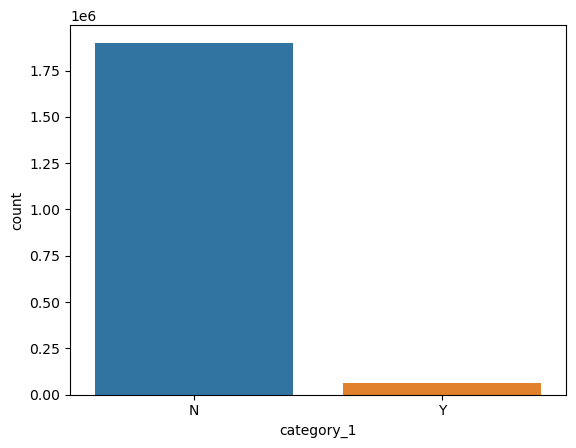

In [ ]:
# plot using countplot
sns.countplot(x="category_1",data=new_merchant_transactions)

In [ ]:
# represent the number of each value in "most_recent_sales_range"
merchants["most_recent_sales_range"].value_counts()

most_recent_sales_range
E    177104
D    117475
C     34075
B      5037
A      1005
Name: count, dtype: int64

<Axes: >

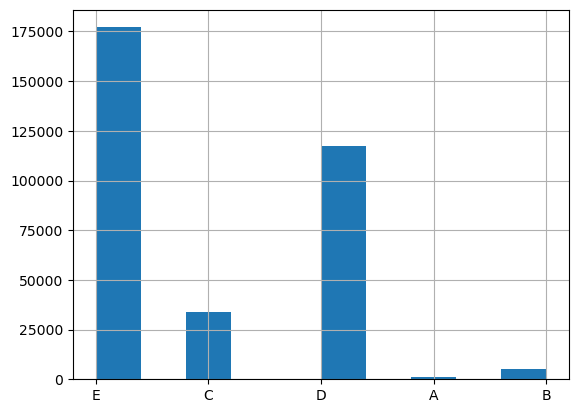

In [ ]:
# draw histogram for "most_recent_sales_range"
merchants["most_recent_sales_range"].hist()

In [ ]:
# represent the number of each value in "most_recent_purchases_range"
merchants["most_recent_purchases_range"].value_counts()

most_recent_purchases_range
E    175309
D    119187
C     34144
B      5046
A      1010
Name: count, dtype: int64

<Axes: >

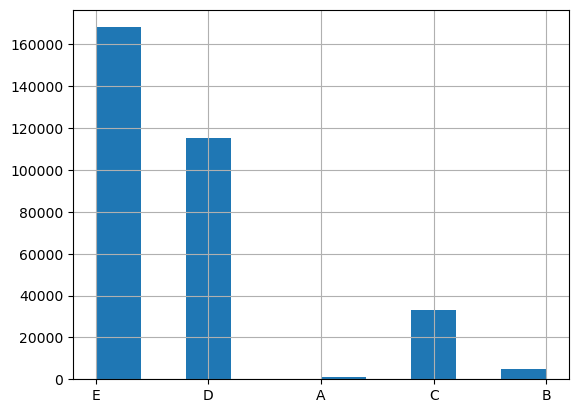

In [ ]:
# draw histogram for "most_recent_sales_range"
merchants["most_recent_purchases_range"].hist()

In [ ]:
result =merchants.most_recent_sales_range.equals(merchants.most_recent_purchases_range)
print(result)

False


**I will Merge merchants table with the result of joining historical transactions table and new merchant transactions table with userscore tabe** 

**Strategy of merging**



- historical transactions table and new merchant transactions table  have the same features , so that I will concat two tables vertically
- I will Merge userscore with the result of joining historical transactions table and new merchant transactions table
- I will Merge merchants table with the result of joining historical transactions table and new merchant transactions table with userscore table


# Question:2

**get the missing value patterns, missing value mechanism for each table :**

**1- historical transactions table** 

In [ ]:
# get the percentage of null value in each column 
null_rates = (historical_transactions.isnull().sum() / historical_transactions.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.4f}%"))

authorized_flag         0.0000%
card_id                 0.0000%
city_id                 0.0000%
category_1              0.0000%
installments            0.0000%
category_3              0.6120%
merchant_category_id    0.0000%
merchant_id             0.4757%
month_lag               0.0000%
purchase_amount         0.0000%
purchase_date           0.0000%
category_2              9.1125%
state_id                0.0000%
subsector_id            0.0000%
dtype: object


In [ ]:
historical_transactions.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

- there are three features in historical transactions contain null values 

<Axes: >

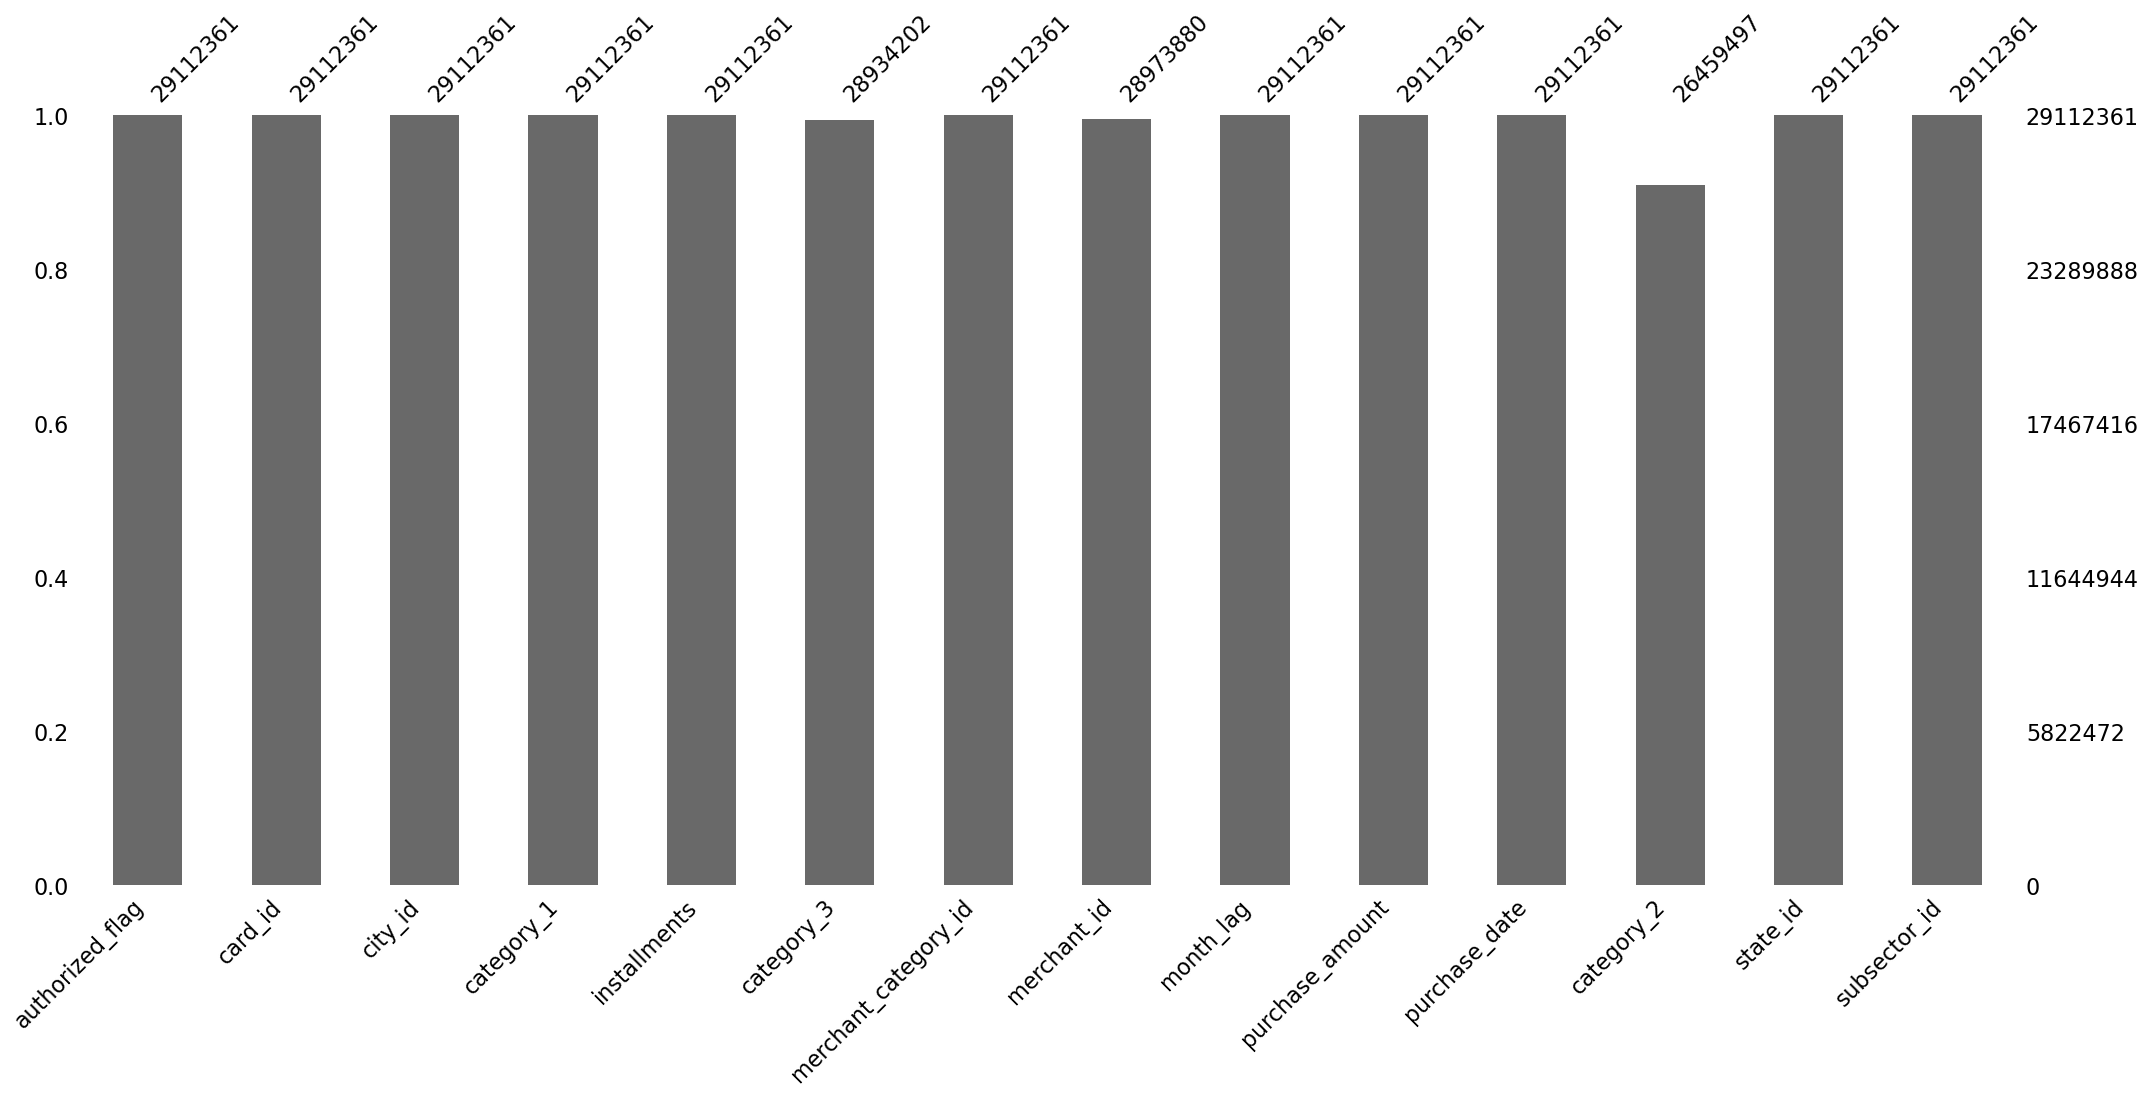

In [ ]:
import missingno as msno
msno.bar(historical_transactions)

<Axes: >

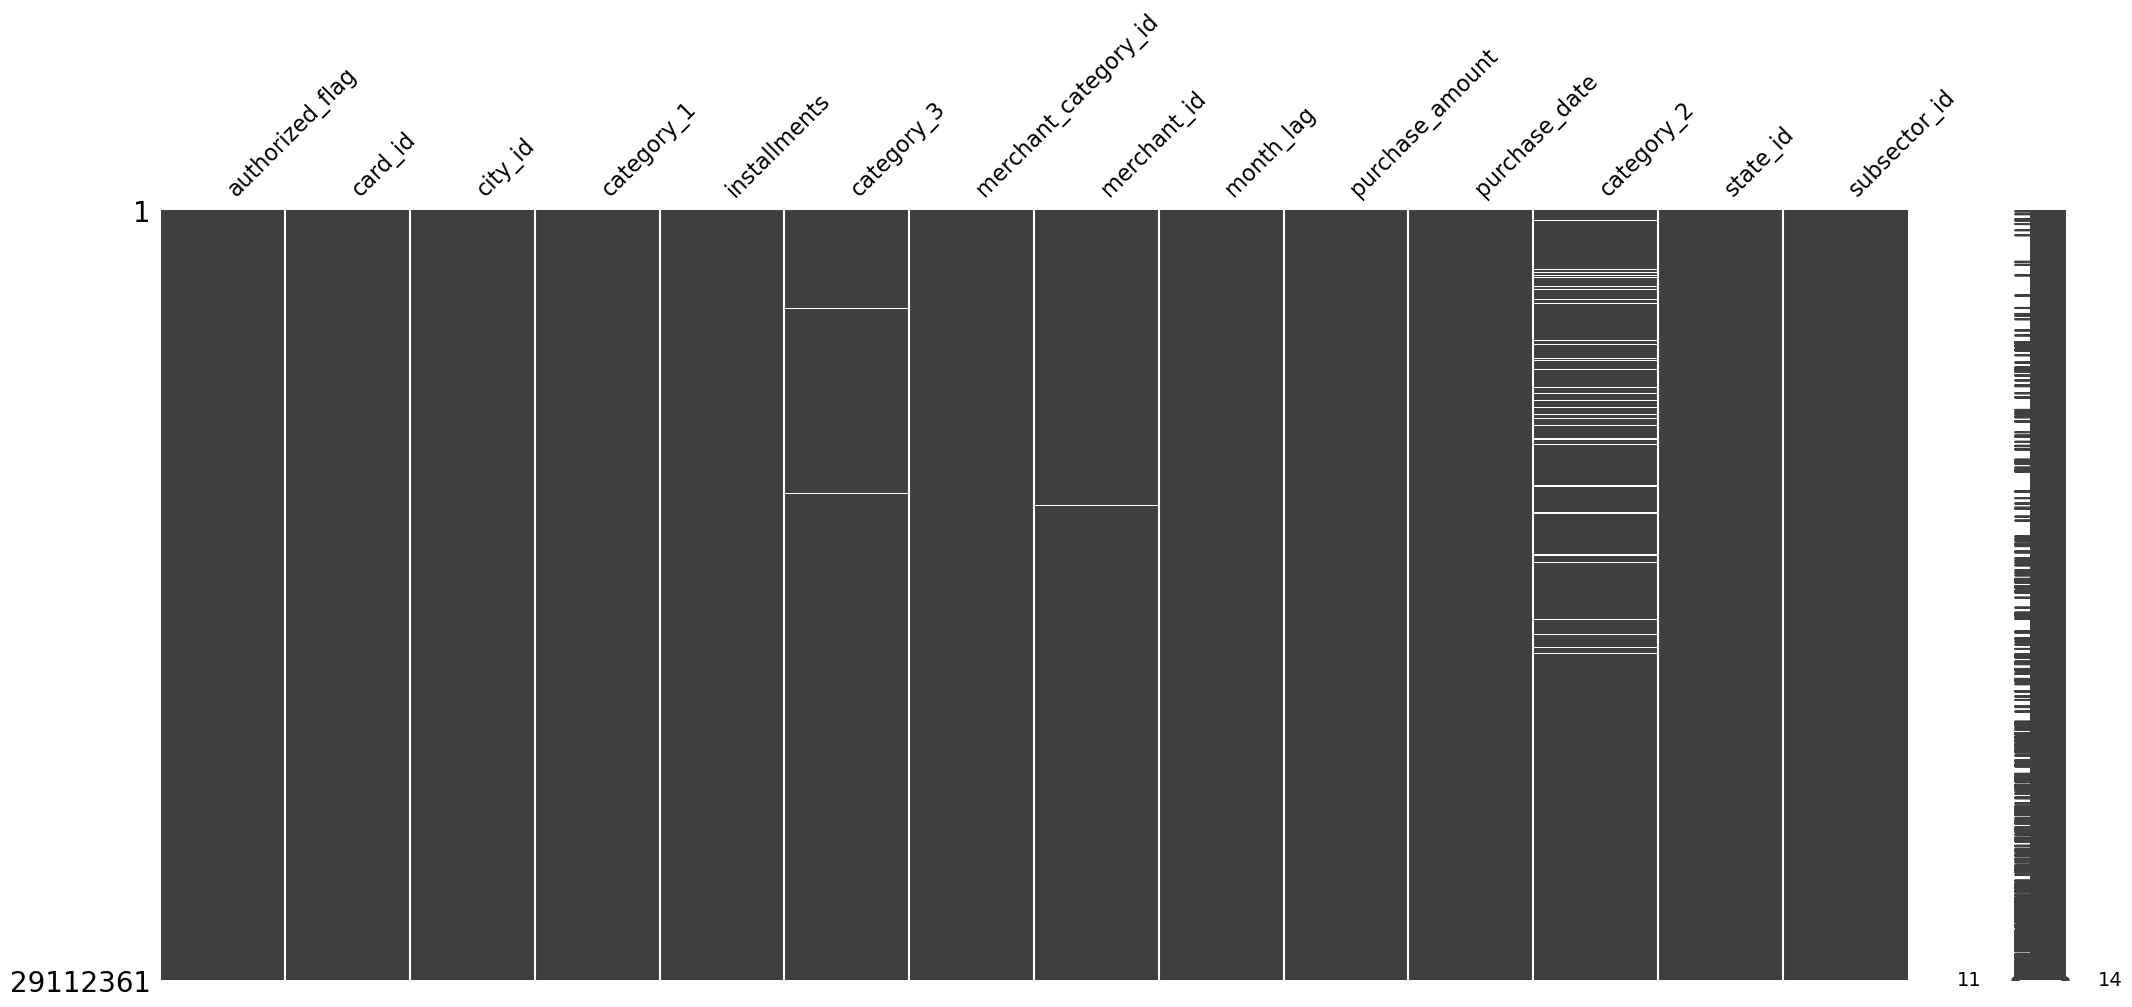

In [ ]:
# Create a heatmap of the null values in the columns
msno.matrix(historical_transactions)

based on msno.bar() function and msno.matrix() function we can detect the pattern and mechanism of three features 'category_2' and 'category_3' and 'merchant_id' , the pattern of three feature is  "General Pattern" and the mechanism of three feature is "MCAR" beacuse no pattern of null between any two features

**2-New merchant transactions table** 

In [ ]:
# get the percentage of null value in each column 
null_rates = (new_merchant_transactions.isnull().sum() / new_merchant_transactions.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.4f}%"))

authorized_flag         0.0000%
card_id                 0.0000%
city_id                 0.0000%
category_1              0.0000%
installments            0.0000%
category_3              2.8488%
merchant_category_id    0.0000%
merchant_id             1.3355%
month_lag               0.0000%
purchase_amount         0.0000%
purchase_date           0.0000%
category_2              5.6925%
state_id                0.0000%
subsector_id            0.0000%
dtype: object


In [ ]:
new_merchant_transactions.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

there are three features in new merchant transactions contain null values 

<Axes: >

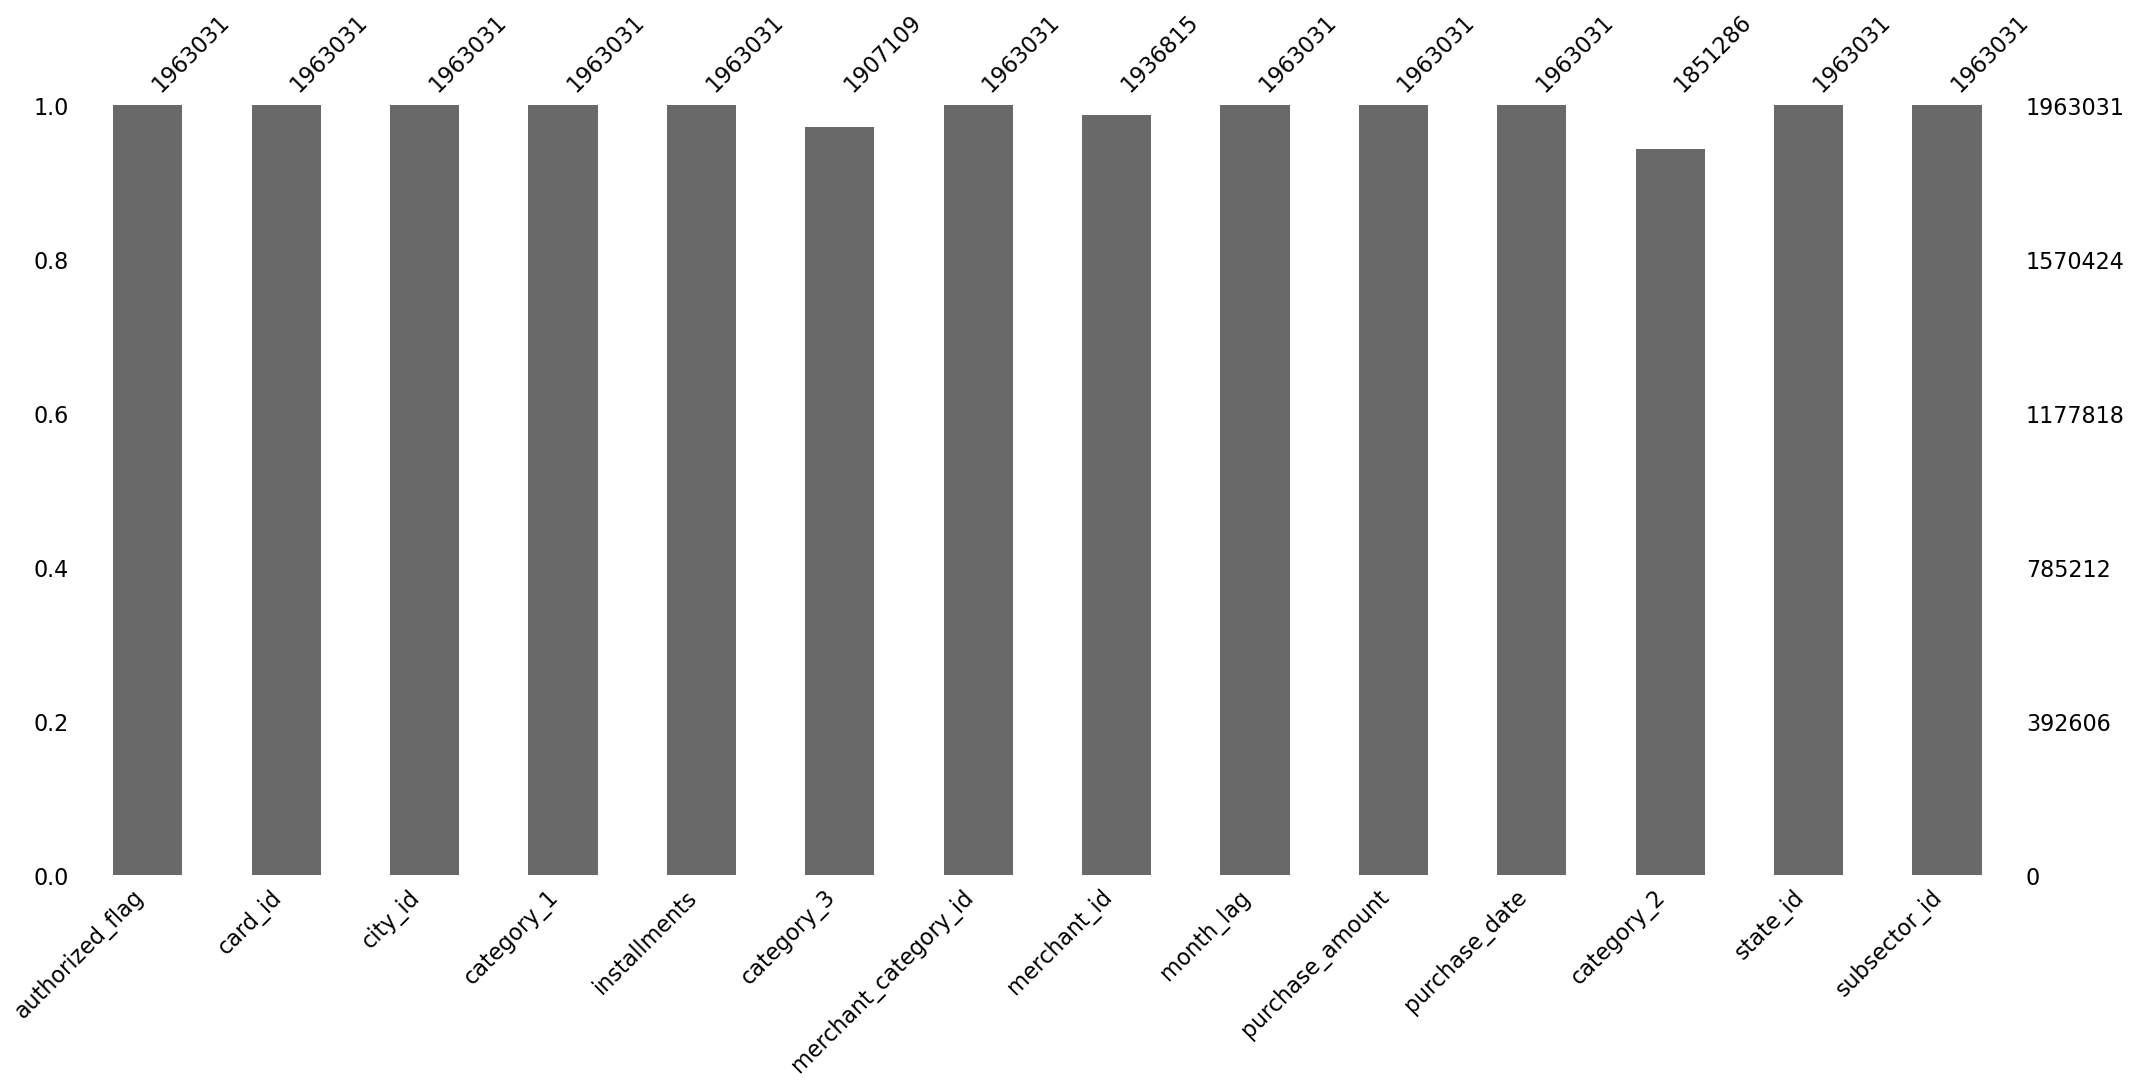

In [ ]:
import missingno as msno
msno.bar(new_merchant_transactions)

<Axes: >

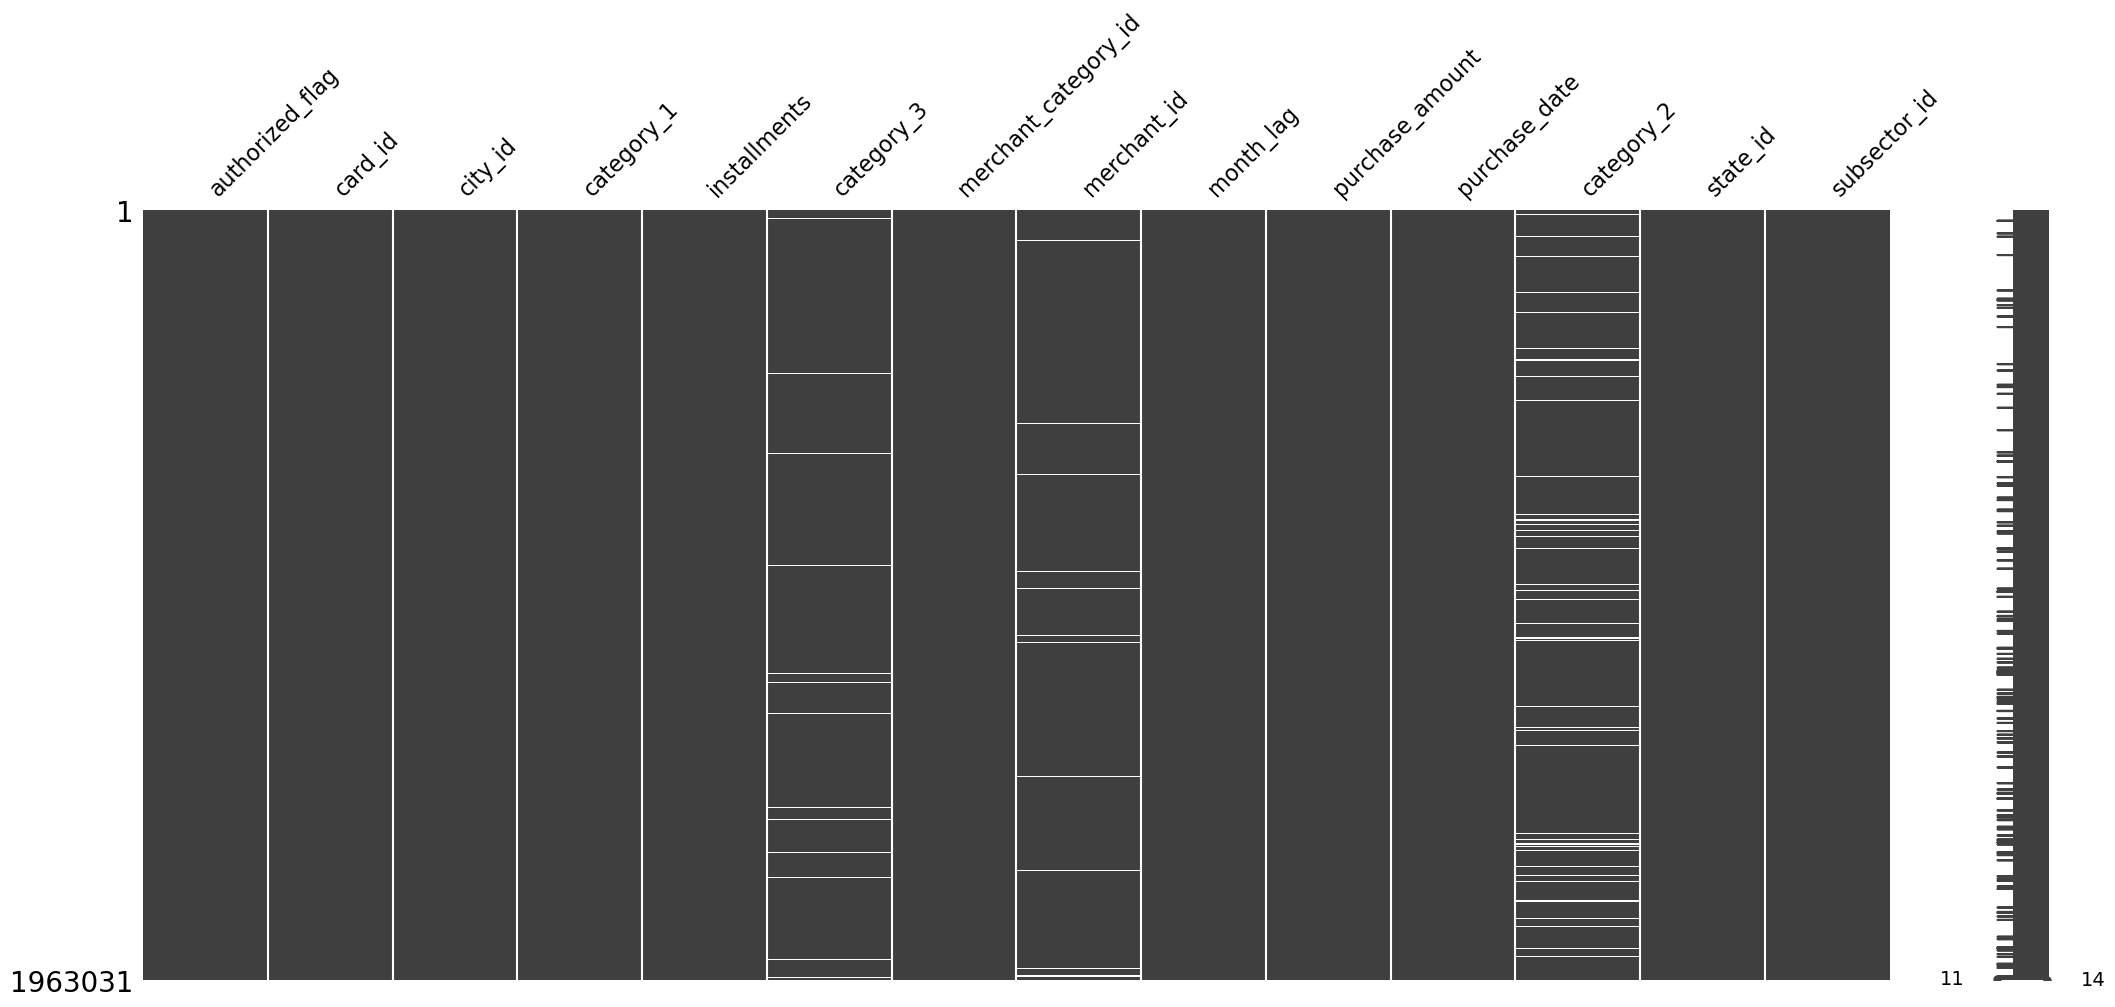

In [ ]:
# Create a heatmap of the null values in the columns
msno.matrix(new_merchant_transactions)

based on msno.bar() function and msno.matrix() function we can detect the pattern and mechanism of three features 'category_2','category_3' and 'merchant_id', the pattern of three feature is "General Pattern"  and the mechanism of three feature is "MCAR" beacuse no pattern of null between any two features

**3-user score transactions table**

In [ ]:
# get the percentage of null value in each column 
null_rates = (userscore.isnull().sum() / userscore.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.4f}%"))

card_id               0.0000%
first_active_month    0.0000%
feature_1             0.0000%
feature_2             0.0000%
feature_3             0.0000%
score                 0.0000%
dtype: object


In [ ]:
userscore.isnull().sum()

card_id               0
first_active_month    0
feature_1             0
feature_2             0
feature_3             0
score                 0
dtype: int64

- there is no features contain null values 

<Axes: >

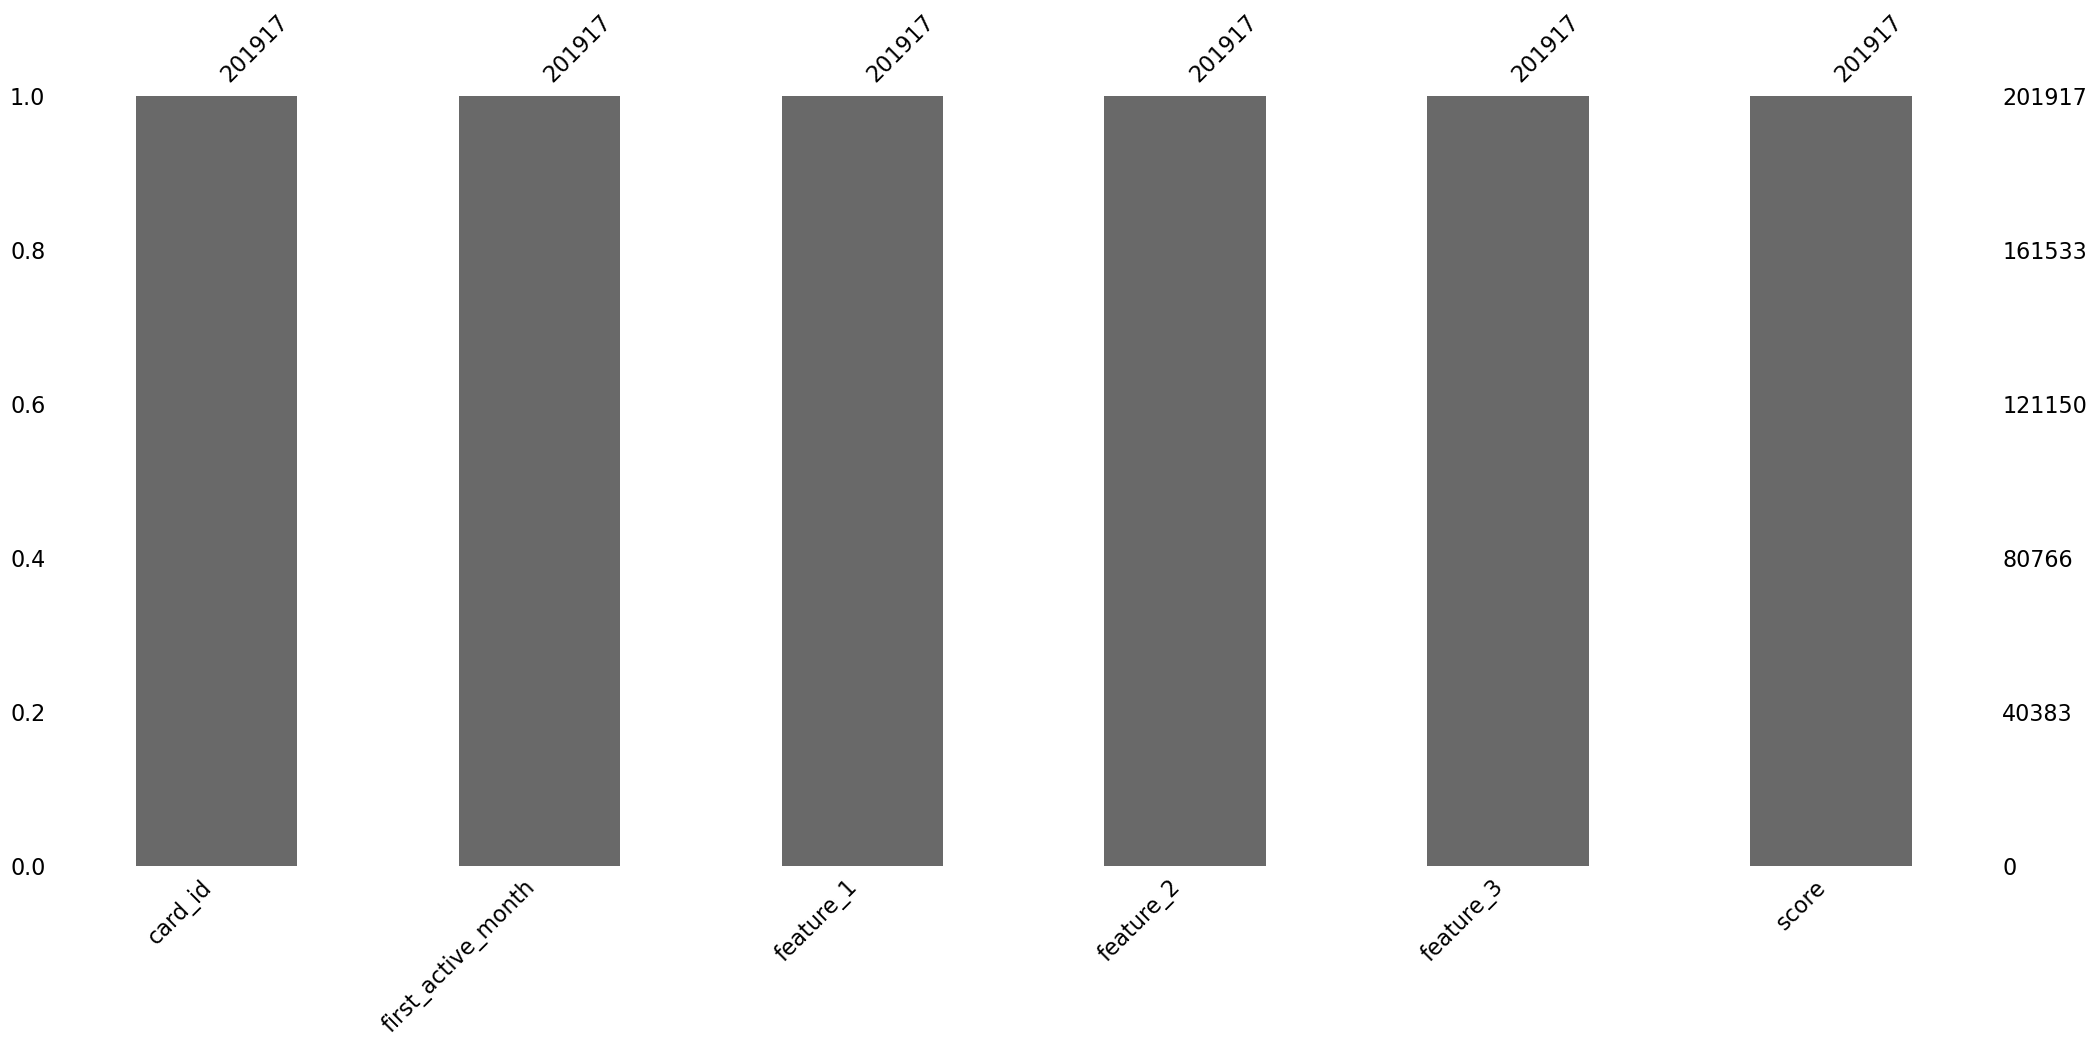

In [ ]:
import missingno as msno
msno.bar(userscore)

<Axes: >

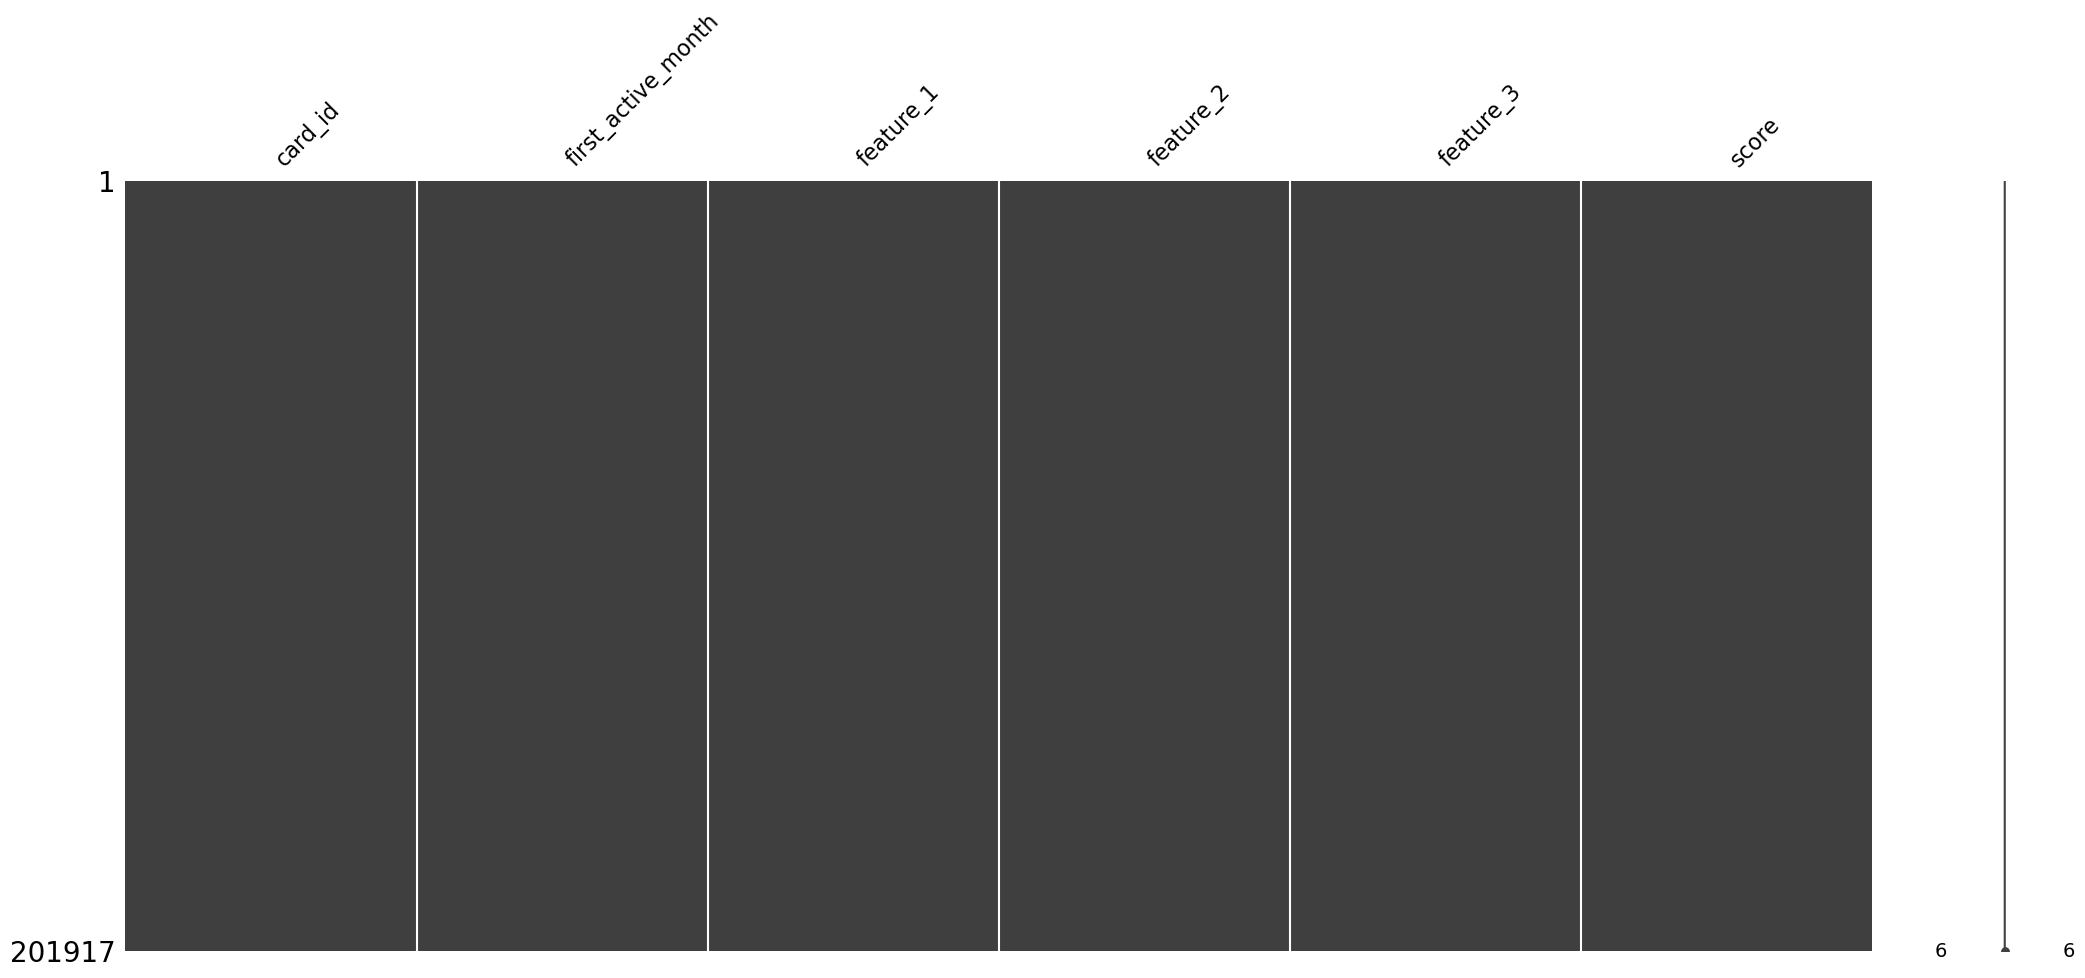

In [ ]:
# Create a heatmap of the null values in the columns
msno.matrix(userscore)

based on msno.bar() function and msno.matrix() function we cannot detect the pattern and mechanism of any features because no null data in all features in table 

**4-merchants table**

In [ ]:
# get the percentage of null value in each column 
null_rates = (merchants.isnull().sum() / merchants.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.4f}%"))

merchant_id                    0.0000%
merchant_group_id              0.0000%
merchant_category_id           0.0000%
subsector_id                   0.0000%
numerical_1                    0.0000%
numerical_2                    0.0000%
category_1                     0.0000%
most_recent_sales_range        0.0000%
most_recent_purchases_range    0.0000%
avg_sales_lag3                 0.0039%
avg_purchases_lag3             0.0000%
active_months_lag3             0.0000%
avg_sales_lag6                 0.0039%
avg_purchases_lag6             0.0000%
active_months_lag6             0.0000%
avg_sales_lag12                0.0039%
avg_purchases_lag12            0.0000%
active_months_lag12            0.0000%
category_4                     0.0000%
city_id                        0.0000%
state_id                       0.0000%
category_2                     3.5516%
dtype: object


In [ ]:
merchants.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

there are four features in merchants that contain null values 

<Axes: >

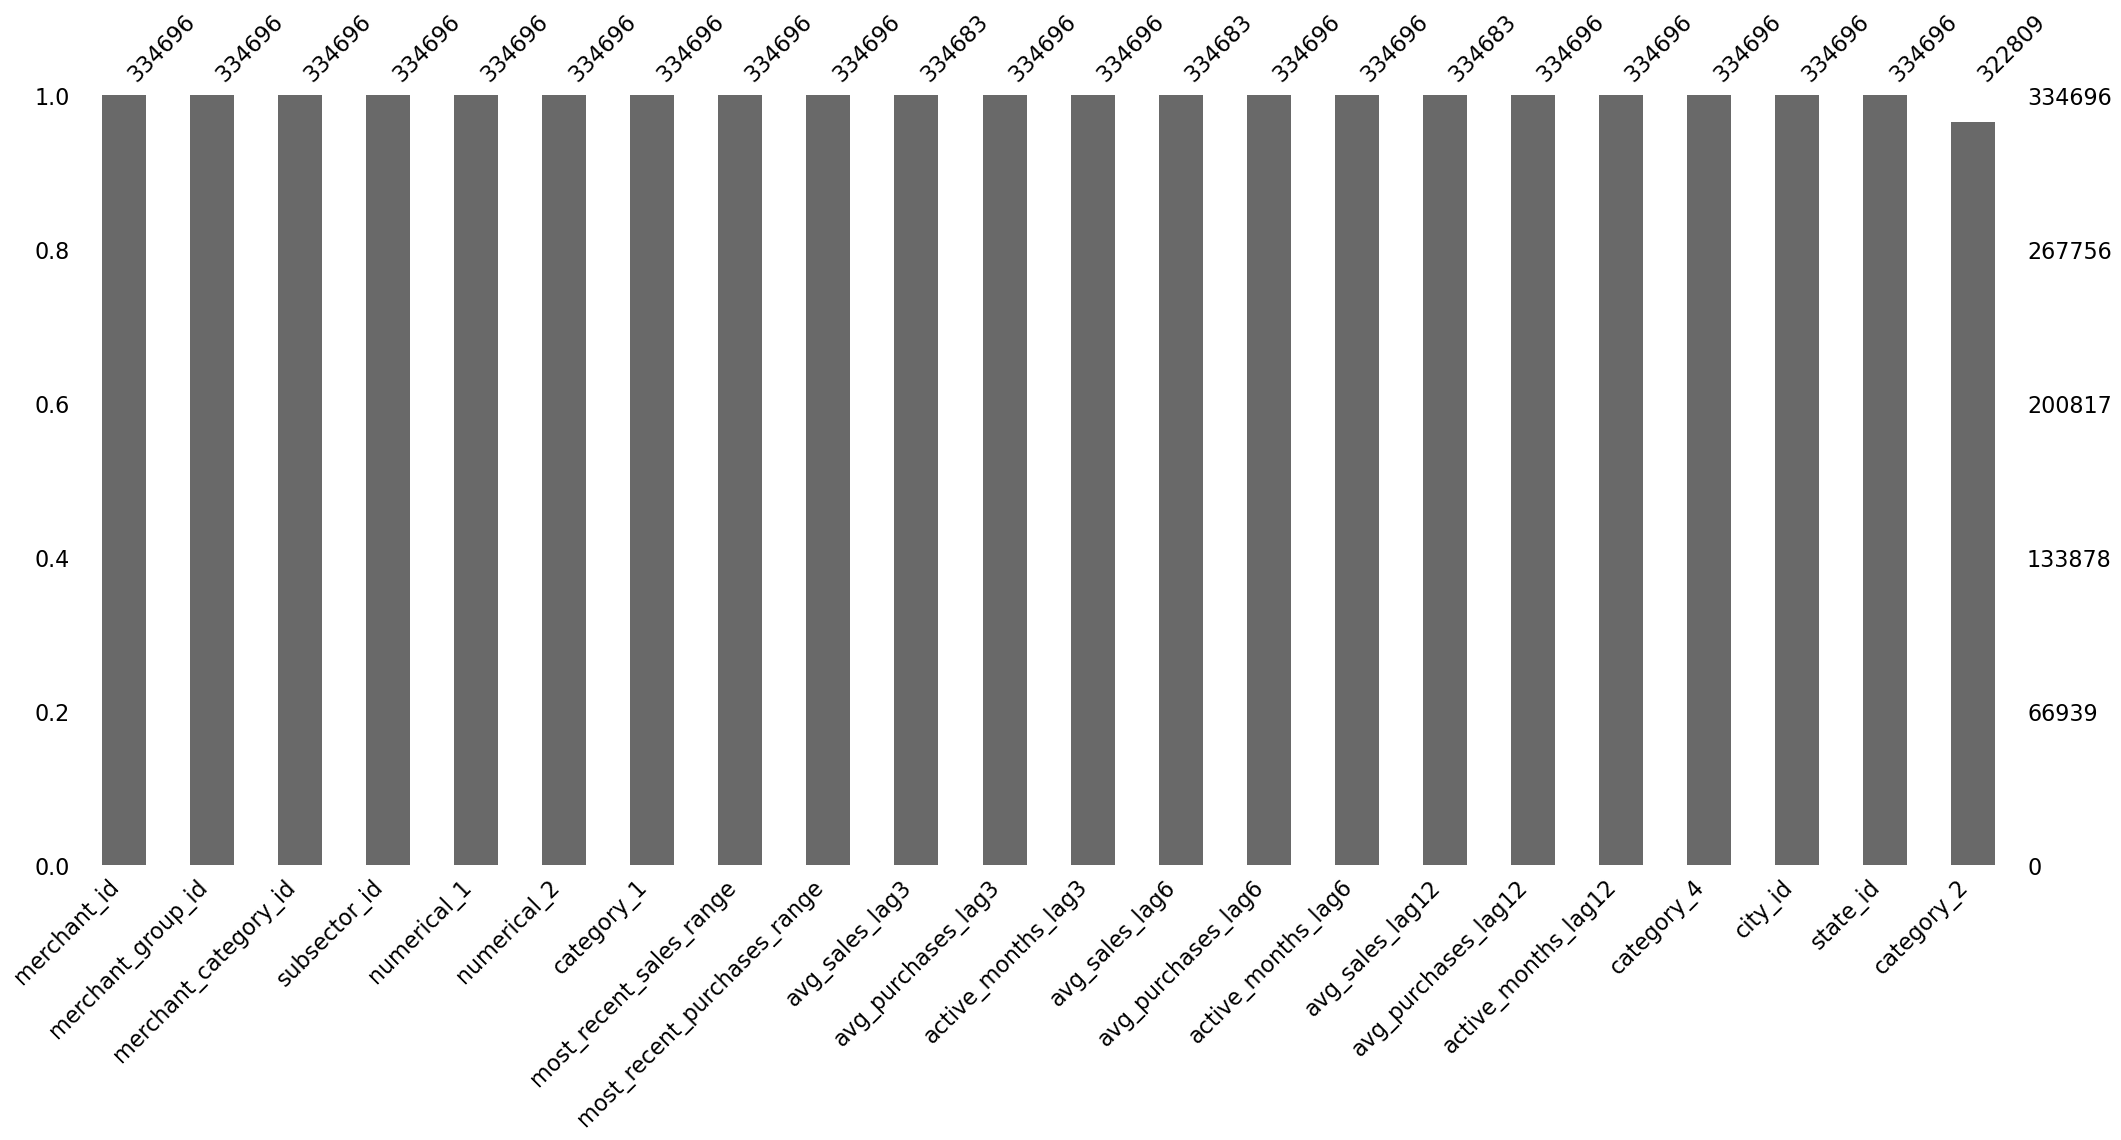

In [ ]:
import missingno as msno
msno.bar(merchants)

<Axes: >

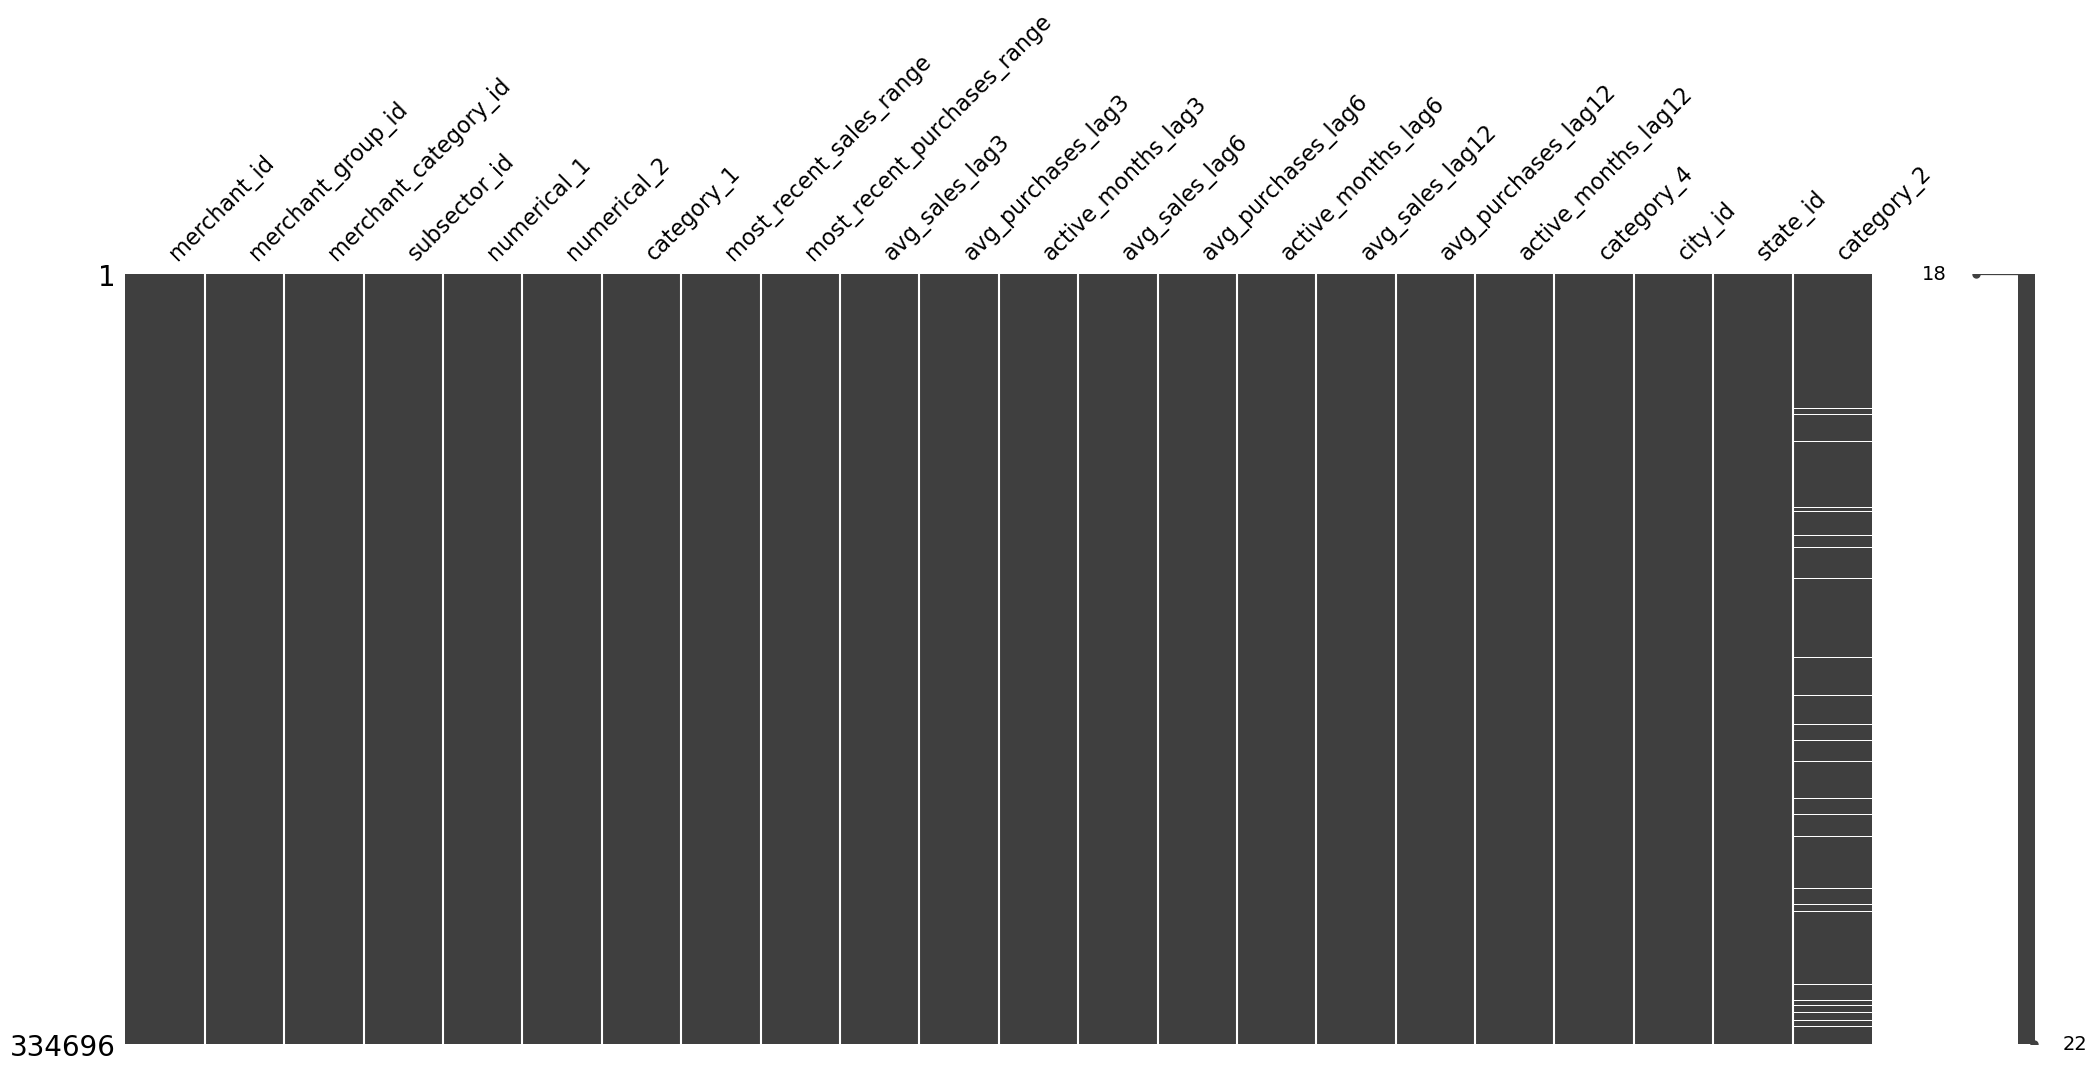

In [ ]:
# Create a heatmap of the null values in the columns
msno.matrix(merchants)

<Axes: >

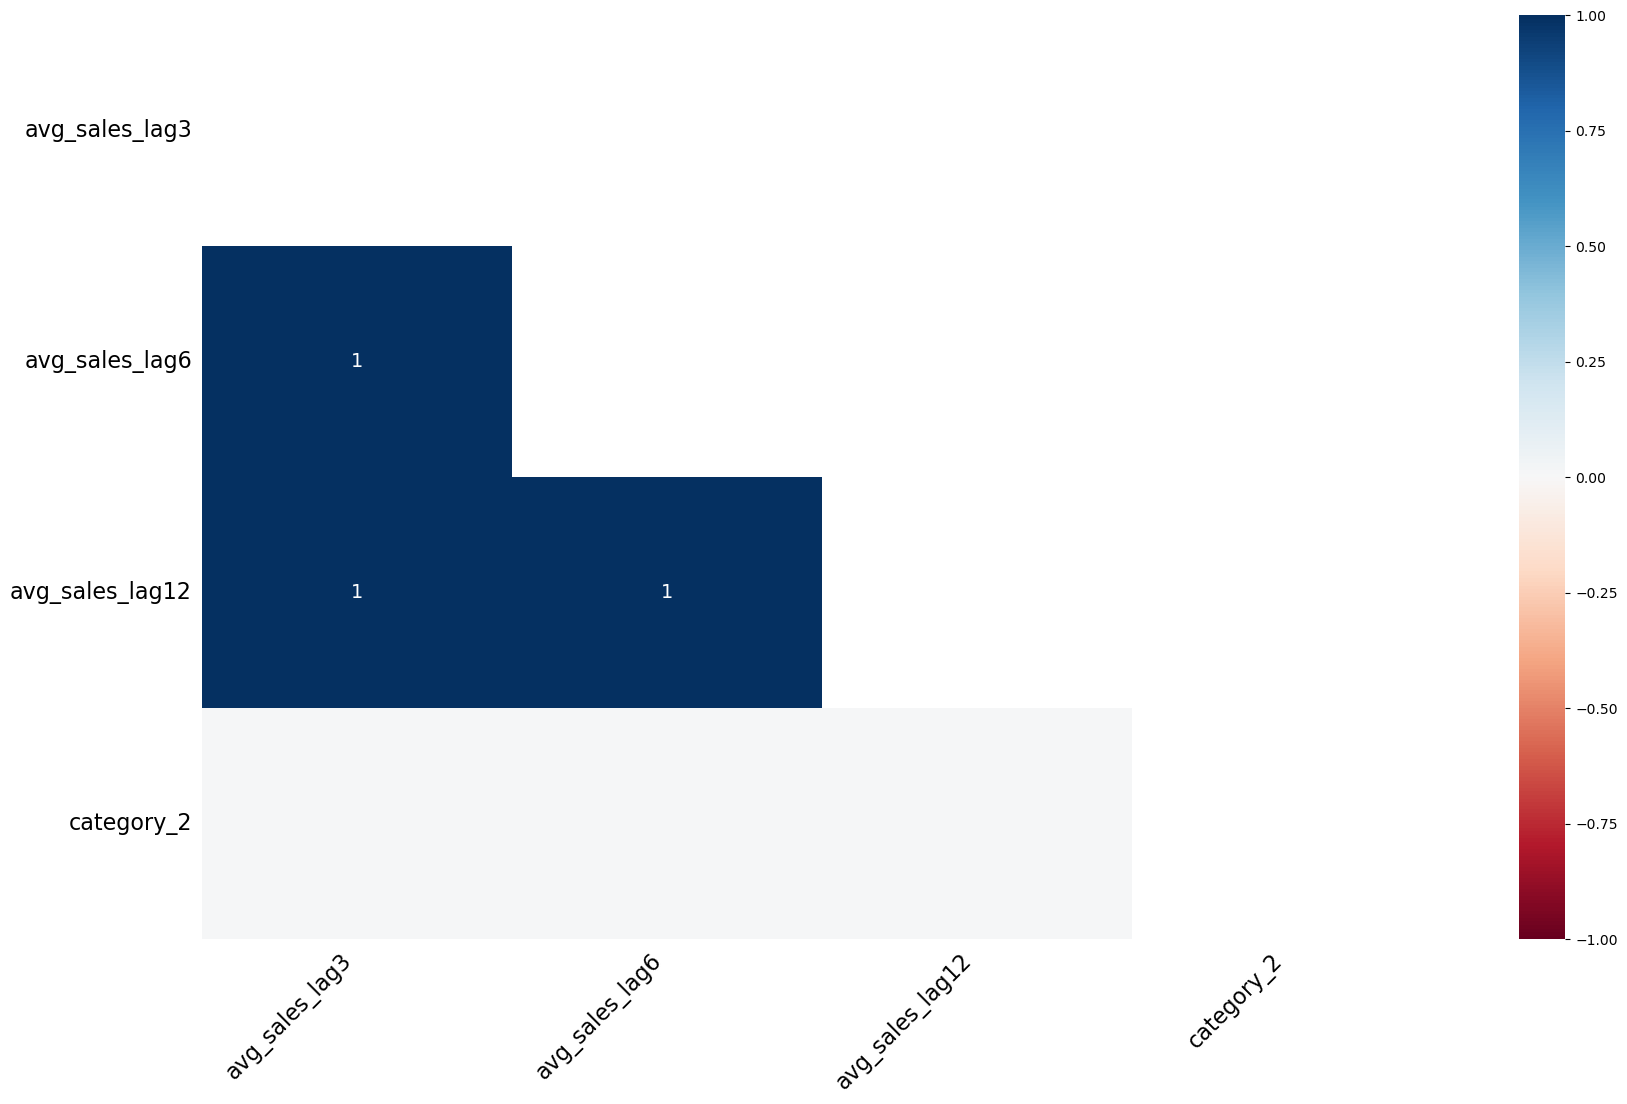

In [ ]:
msno.heatmap(merchants)

based on msno.bar() function and msno.matrix() function , there is one feature 'category_2' contain null so that the pattern is "General Pattern" and mechanism is "MCAR" beacuse no pattern of null in 'category_2' feature and another feature


also, there are three column contain the same number of null values and the correlation between them is very high ,these features are "avg_sales_lag3", "avg_sales_lag6" , "avg_sales_lag12"  their pattern is "Unit Nonresponse Pattern", and their mechanism is "MAR" because when one of them contain null another two feature contain null and when one of them contain value another two features contain value , so that there are pattern of null between three features  

# Question 3 : 

**Handle null values in each table** 

**1- historical transactions**

In [ ]:
# get the percentage of null value in each column 
null_rates = (historical_transactions.isnull().sum() / historical_transactions.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.4f}%"))

authorized_flag         0.0000%
card_id                 0.0000%
city_id                 0.0000%
category_1              0.0000%
installments            0.0000%
category_3              0.6120%
merchant_category_id    0.0000%
merchant_id             0.4757%
month_lag               0.0000%
purchase_amount         0.0000%
purchase_date           0.0000%
category_2              9.1125%
state_id                0.0000%
subsector_id            0.0000%
dtype: object


<Axes: >

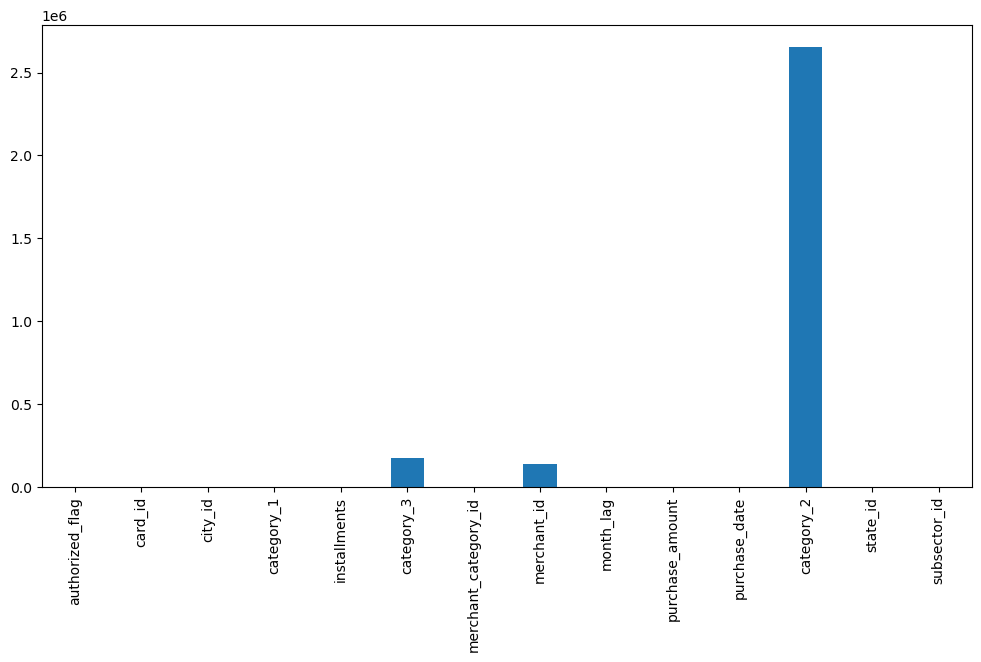

In [ ]:
# make visualization of null values 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
historical_transactions.isna().sum().plot(kind="bar")

In [ ]:
# I will Use simple imputer to fill the values of "category_2" using mean strategy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
# Impute the missing values in the `category_2` column
imputer.fit(historical_transactions[["category_2"]])
historical_transactions["category_2"] = imputer.transform(historical_transactions[["category_2"]])

In [ ]:
# replace the values of "999" into Null in "installments" in  historical transactions
historical_transactions['installments'].replace(999, np.nan, inplace=True)

In [ ]:
# represent the number of each value in "installments" after replacement
historical_transactions["installments"].value_counts()

installments
 0.0     15411747
 1.0     11677522
 2.0       666416
 3.0       538207
 4.0       179525
-1.0       178159
 6.0       132634
 10.0      118827
 5.0       116090
 12.0       55064
 8.0        20474
 7.0        10906
 9.0         5772
 11.0         830
Name: count, dtype: int64

In [ ]:
# I will use dropna() function to drop null from historical transactions table after impute "category_2" 
historical_transactions=historical_transactions.dropna()

In [ ]:
# get the percentage of null value in each column after dropping null values
null_rates = (historical_transactions.isnull().sum() / historical_transactions.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.4f}%"))

authorized_flag         0.0000%
card_id                 0.0000%
city_id                 0.0000%
category_1              0.0000%
installments            0.0000%
category_3              0.0000%
merchant_category_id    0.0000%
merchant_id             0.0000%
month_lag               0.0000%
purchase_amount         0.0000%
purchase_date           0.0000%
category_2              0.0000%
state_id                0.0000%
subsector_id            0.0000%
dtype: object


**Note**
 
installments feature in historical transactions contain negative number , I will replace negative number with zero 

In [ ]:
# Replace negative values in the installments column with zero
historical_transactions['installments'] = historical_transactions['installments'].where(historical_transactions['installments'] >= 0, 0)

check null values after Replacement

In [ ]:
# Count the number of negative numbers and positive numbers in historical transactions
negative_count = len(historical_transactions[historical_transactions['installments'] < 0])
postive_count = len(historical_transactions[historical_transactions['installments'] > 0])
# Print the count
print('Number of negative numbers:', negative_count)
print('Number of positive numbers:', postive_count)

Number of negative numbers: 0
Number of positive numbers: 13466275


**2- New merchant transactions**

In [ ]:
# get the percentage of null value in each column 
null_rates = (new_merchant_transactions.isnull().sum() / new_merchant_transactions.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.4f}%"))

authorized_flag         0.0000%
card_id                 0.0000%
city_id                 0.0000%
category_1              0.0000%
installments            0.0000%
category_3              2.8488%
merchant_category_id    0.0000%
merchant_id             1.3355%
month_lag               0.0000%
purchase_amount         0.0000%
purchase_date           0.0000%
category_2              5.6925%
state_id                0.0000%
subsector_id            0.0000%
dtype: object


<Axes: >

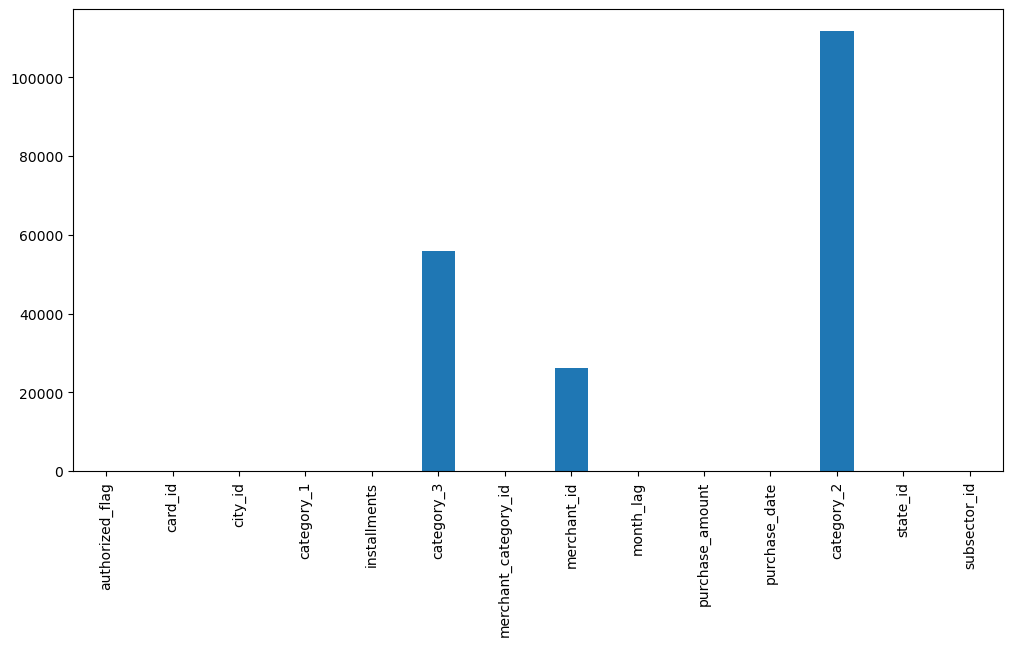

In [ ]:
# make visualization of null values 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
new_merchant_transactions.isna().sum().plot(kind="bar")

In [ ]:
# I will Use simple imputer to fill the values of  "category_2" using mean strategy
imputer = SimpleImputer(strategy="mean")
# Impute the missing values in the `age` column
imputer.fit(new_merchant_transactions[["category_2"]])
new_merchant_transactions["category_2"] = imputer.transform(new_merchant_transactions[["category_2"]])

In [ ]:
# replace the values of "999" into Null in "installments" in  new merchant transactions "installments" column 
new_merchant_transactions['installments'].replace(999, np.nan, inplace=True)

In [ ]:
# represent the number of each value in "installments" after replacement
new_merchant_transactions["installments"].value_counts()

installments
 0.0     922244
 1.0     836178
-1.0      55922
 2.0      54729
 3.0      44750
 4.0      14815
 6.0      10389
 5.0       9296
 10.0      8899
 12.0      2850
 8.0       1555
 7.0        863
 9.0        478
 11.0        61
Name: count, dtype: int64

In [ ]:
# I will use dropna() function to drop all null from new_merchant_transactions table after impute 
new_merchant_transactions=new_merchant_transactions.dropna()

In [ ]:
# get the percentage of null value in each column after dropping null values
null_rates = (new_merchant_transactions.isnull().sum() / new_merchant_transactions.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.4f}%"))

authorized_flag         0.0000%
card_id                 0.0000%
city_id                 0.0000%
category_1              0.0000%
installments            0.0000%
category_3              0.0000%
merchant_category_id    0.0000%
merchant_id             0.0000%
month_lag               0.0000%
purchase_amount         0.0000%
purchase_date           0.0000%
category_2              0.0000%
state_id                0.0000%
subsector_id            0.0000%
dtype: object


**Note**

installments feature in new merchant transactions contain negative number  , I will replace negative number with zero 

In [ ]:
# Replace negative values in the installments column with zero
new_merchant_transactions['installments'] = new_merchant_transactions['installments'].where(new_merchant_transactions['installments'] >= 0, 0)

check null values after Replacement

In [ ]:
# Count the number of negative numbers and positive numbers in historical transactions
negative_count = len(new_merchant_transactions[new_merchant_transactions['installments'] < 0])
postive_count = len(new_merchant_transactions[new_merchant_transactions['installments'] > 0])
# Print the count
print('Number of negative numbers:', negative_count)
print('Number of positive numbers:', postive_count)

Number of negative numbers: 0
Number of positive numbers: 973989


**3- Merchants** 

In [ ]:
# get the percentage of null value in each column  
null_rates = (merchants.isnull().sum() / merchants.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.4f}%"))

merchant_id                    0.0000%
merchant_group_id              0.0000%
merchant_category_id           0.0000%
subsector_id                   0.0000%
numerical_1                    0.0000%
numerical_2                    0.0000%
category_1                     0.0000%
most_recent_sales_range        0.0000%
most_recent_purchases_range    0.0000%
avg_sales_lag3                 0.0039%
avg_purchases_lag3             0.0000%
active_months_lag3             0.0000%
avg_sales_lag6                 0.0039%
avg_purchases_lag6             0.0000%
active_months_lag6             0.0000%
avg_sales_lag12                0.0039%
avg_purchases_lag12            0.0000%
active_months_lag12            0.0000%
category_4                     0.0000%
city_id                        0.0000%
state_id                       0.0000%
category_2                     3.5516%
dtype: object


<Axes: >

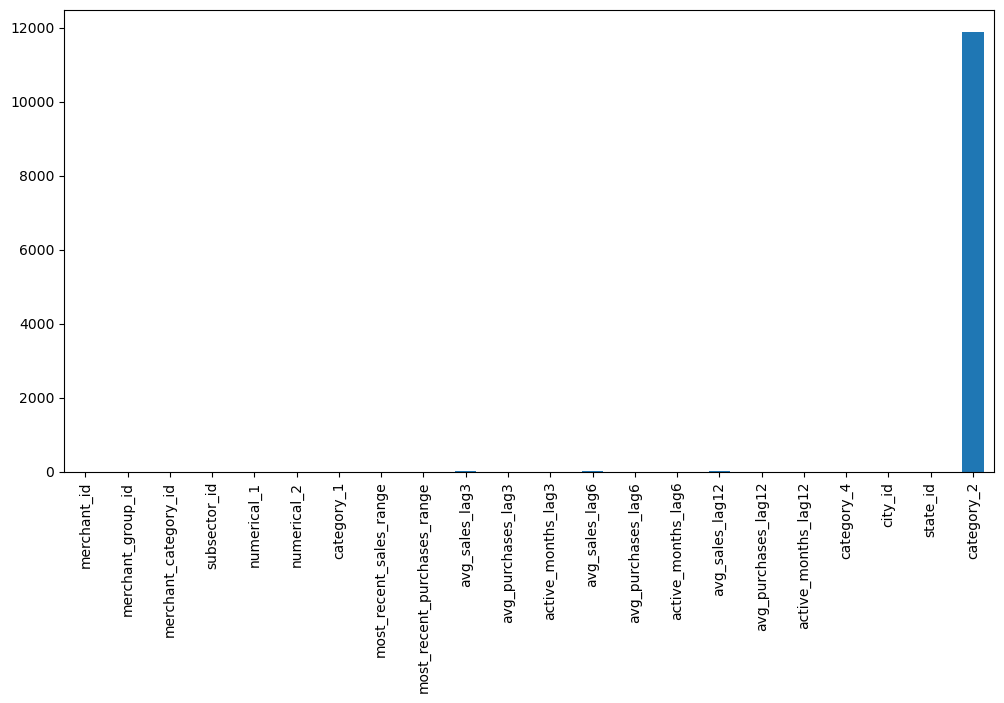

In [ ]:
# make visualization of null values 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
merchants.isna().sum().plot(kind="bar")

In [ ]:
# I will use dropna() function to drop all null from merchants table 
merchants=merchants.dropna()

In [ ]:
# get the percentage of null value in each column after dropping null values
null_rates = (merchants.isnull().sum() / merchants.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.4f}%"))

merchant_id                    0.0000%
merchant_group_id              0.0000%
merchant_category_id           0.0000%
subsector_id                   0.0000%
numerical_1                    0.0000%
numerical_2                    0.0000%
category_1                     0.0000%
most_recent_sales_range        0.0000%
most_recent_purchases_range    0.0000%
avg_sales_lag3                 0.0000%
avg_purchases_lag3             0.0000%
active_months_lag3             0.0000%
avg_sales_lag6                 0.0000%
avg_purchases_lag6             0.0000%
active_months_lag6             0.0000%
avg_sales_lag12                0.0000%
avg_purchases_lag12            0.0000%
active_months_lag12            0.0000%
category_4                     0.0000%
city_id                        0.0000%
state_id                       0.0000%
category_2                     0.0000%
dtype: object


**Note :** 

there are features in merchants table contain infinite(inf) , but dropna() function make dropping of rows that contain infinite values 

In [ ]:
# check infinite values after using dropna() function
ds = merchants.isin([np.inf, -np.inf]).values.sum()
print(ds)

0


**4-userscore**

In [ ]:
# check null values 
null_rates = (userscore.isnull().sum() / userscore.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.4f}%"))

card_id               0.0000%
first_active_month    0.0000%
feature_1             0.0000%
feature_2             0.0000%
feature_3             0.0000%
score                 0.0000%
dtype: object


**- no null values in user score** 

**Merge Tables** 

In [ ]:
# make concat between historical_transactions and new_merchant_transactions because the two tables have the same features
join_vertically=pd.concat([historical_transactions,new_merchant_transactions])

In [ ]:
# Convert the `purchase_date` column to a column of dates
join_vertically['purchase_date'] = pd.to_datetime(join_vertically['purchase_date'])

# Convert the `authorized_flag` column from (yes and no) to (1 and 0)
join_vertically['authorized_flag'] = join_vertically['authorized_flag'].replace({'yes': 1, 'no': 0})

# make an Aggregation on all features in join_vertically,groping them by`card_id`
aggregated_data = join_vertically.groupby('card_id').agg({
    'authorized_flag': 'sum',
    'city_id': 'count',
    'category_1': 'count',
    'installments': 'mean',
    'category_3': 'count',
    'merchant_category_id': 'count',
    'merchant_id':lambda x: x.mode()[0],
    'month_lag': 'mean',
    'purchase_amount': 'sum',
    'purchase_date':  'min'
    
}
)

In [ ]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325540 entries, C_ID_00007093c1 to C_ID_fffffd5772
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   authorized_flag       325540 non-null  object        
 1   city_id               325540 non-null  int64         
 2   category_1            325540 non-null  int64         
 3   installments          325540 non-null  float64       
 4   category_3            325540 non-null  int64         
 5   merchant_category_id  325540 non-null  int64         
 6   merchant_id           325540 non-null  object        
 7   month_lag             325540 non-null  float64       
 8   purchase_amount       325540 non-null  float64       
 9   purchase_date         325540 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 27.3+ MB


In [ ]:
# make an inner join between join_vertically table and userscore table on 'card_id'
join_horizontally=aggregated_data.merge(userscore,on="card_id",how="inner") 

In [ ]:
# make an inner join between join_horizontally table and merchants table on 'merchant_id'
final_table=join_horizontally.merge(merchants,on="merchant_id",how="inner")  

In [ ]:
# get info after joining all tables
final_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147535 entries, 0 to 147534
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   card_id                      147535 non-null  object        
 1   authorized_flag              147535 non-null  object        
 2   city_id_x                    147535 non-null  int64         
 3   category_1_x                 147535 non-null  int64         
 4   installments                 147535 non-null  float64       
 5   category_3                   147535 non-null  int64         
 6   merchant_category_id_x       147535 non-null  int64         
 7   merchant_id                  147535 non-null  object        
 8   month_lag                    147535 non-null  float64       
 9   purchase_amount              147535 non-null  float64       
 10  purchase_date                147535 non-null  datetime64[ns]
 11  first_active_month        

In [ ]:
# get the summation of null values in each column in final_table 
final_table.isna().sum()

card_id                        0
authorized_flag                0
city_id_x                      0
category_1_x                   0
installments                   0
category_3                     0
merchant_category_id_x         0
merchant_id                    0
month_lag                      0
purchase_amount                0
purchase_date                  0
first_active_month             0
feature_1                      0
feature_2                      0
feature_3                      0
score                          0
merchant_group_id              0
merchant_category_id_y         0
subsector_id                   0
numerical_1                    0
numerical_2                    0
category_1_y                   0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             0
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             0
active_months_lag6             0
avg_sales_

In [ ]:
# get the percentage of null value in each column 
null_rates = (final_table.isnull().sum() / final_table.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.4f}%"))

card_id                        0.0000%
authorized_flag                0.0000%
city_id_x                      0.0000%
category_1_x                   0.0000%
installments                   0.0000%
category_3                     0.0000%
merchant_category_id_x         0.0000%
merchant_id                    0.0000%
month_lag                      0.0000%
purchase_amount                0.0000%
purchase_date                  0.0000%
first_active_month             0.0000%
feature_1                      0.0000%
feature_2                      0.0000%
feature_3                      0.0000%
score                          0.0000%
merchant_group_id              0.0000%
merchant_category_id_y         0.0000%
subsector_id                   0.0000%
numerical_1                    0.0000%
numerical_2                    0.0000%
category_1_y                   0.0000%
most_recent_sales_range        0.0000%
most_recent_purchases_range    0.0000%
avg_sales_lag3                 0.0000%
avg_purchases_lag3       

**dropping attributes that are not useful**

In [ ]:
final_table.drop(['card_id','authorized_flag', 'category_1_x','category_1_y','installments', 'category_3', 'month_lag','merchant_id','merchant_group_id'], axis=1, inplace=True)

**get the correlation between features and target** 

In [ ]:
# select integer and float data and store them in 'df_draw' 
df_draw = final_table.select_dtypes(include=['int', 'float'])

<Axes: >

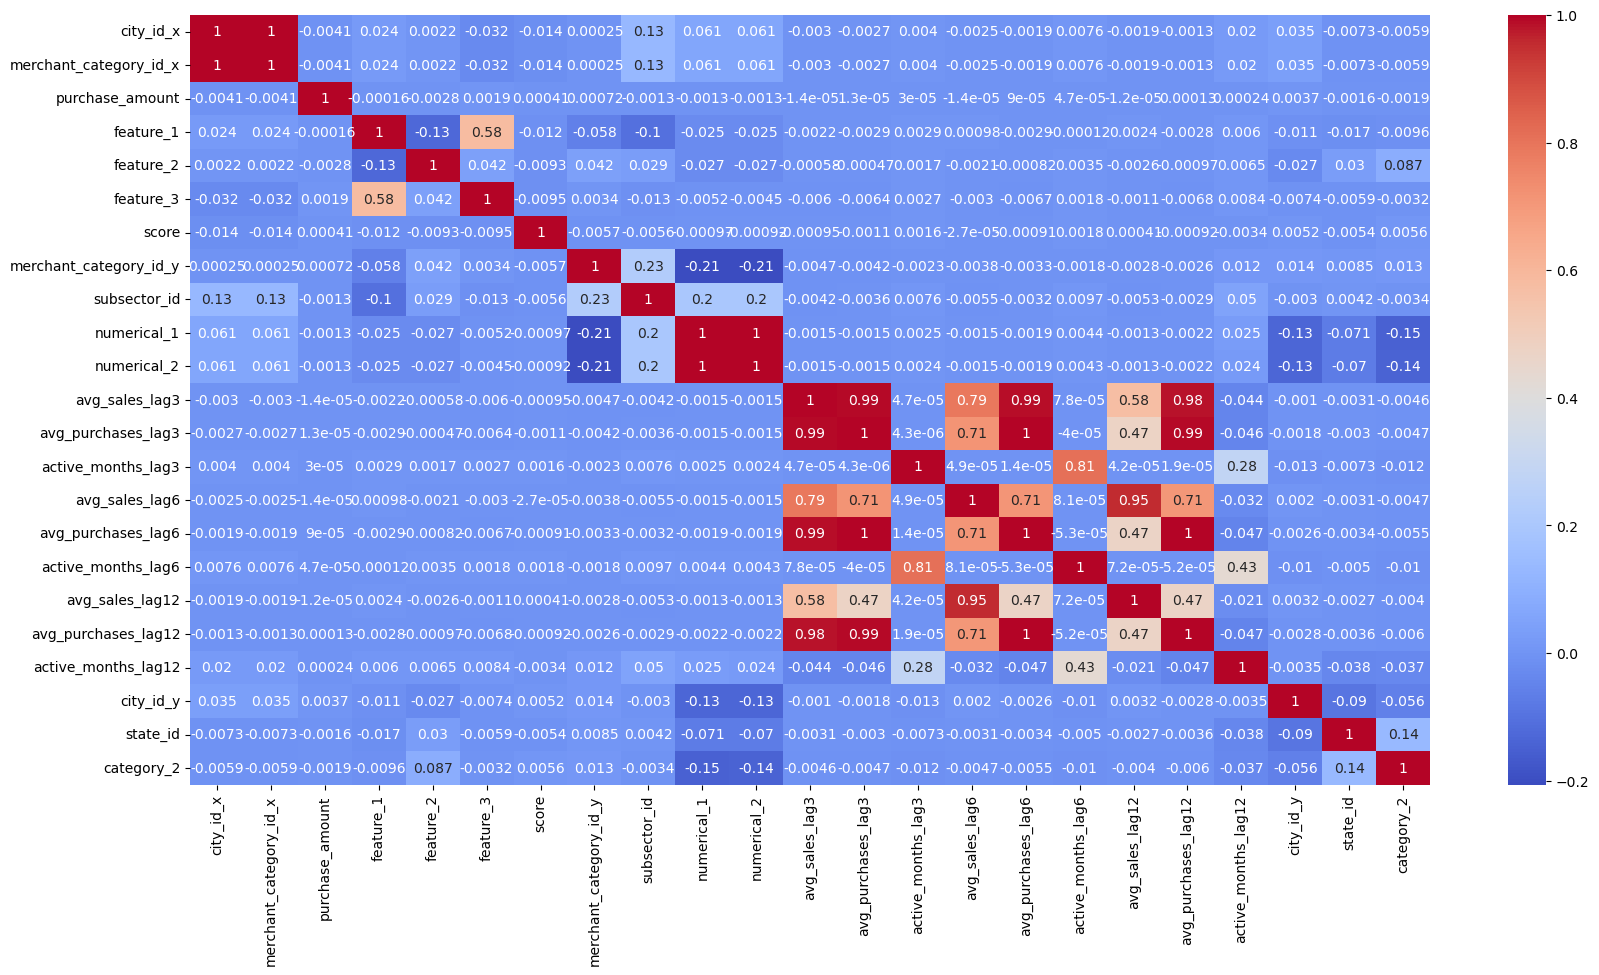

In [ ]:
# import seaborn as sns 
import seaborn as sns 
fig, ax = plt.subplots(figsize=(20, 10))
# Calculate the correlation matrix
corr = df_draw.corr()
# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

**based on the correlation ,I will drop set of features based on the features that have high correlation with another feature**   

<Axes: >

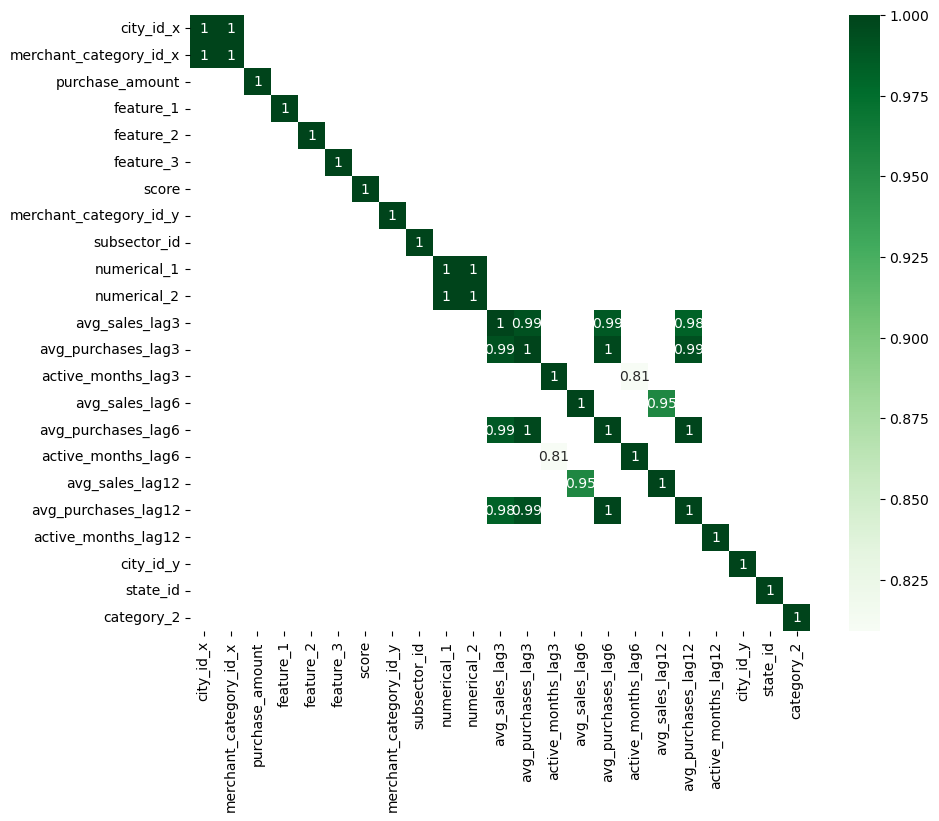

In [ ]:
#filtering the fatures with correlation greater than or equal 0.8
hcr=corr[corr>=0.8]
plt.figure(figsize=(10,8))
sns.heatmap(hcr,annot=True,cmap='Greens')

In [ ]:
final_table.drop(['city_id_x','numerical_2','avg_purchases_lag12','avg_purchases_lag3','merchant_category_id_y','merchant_category_id_x','numerical_2','avg_sales_lag3','avg_sales_lag6','active_months_lag6'], axis=1, inplace=True)

In [ ]:
# select float and integer number
df_draw = final_table.select_dtypes(include=['int', 'float'])

<Axes: >

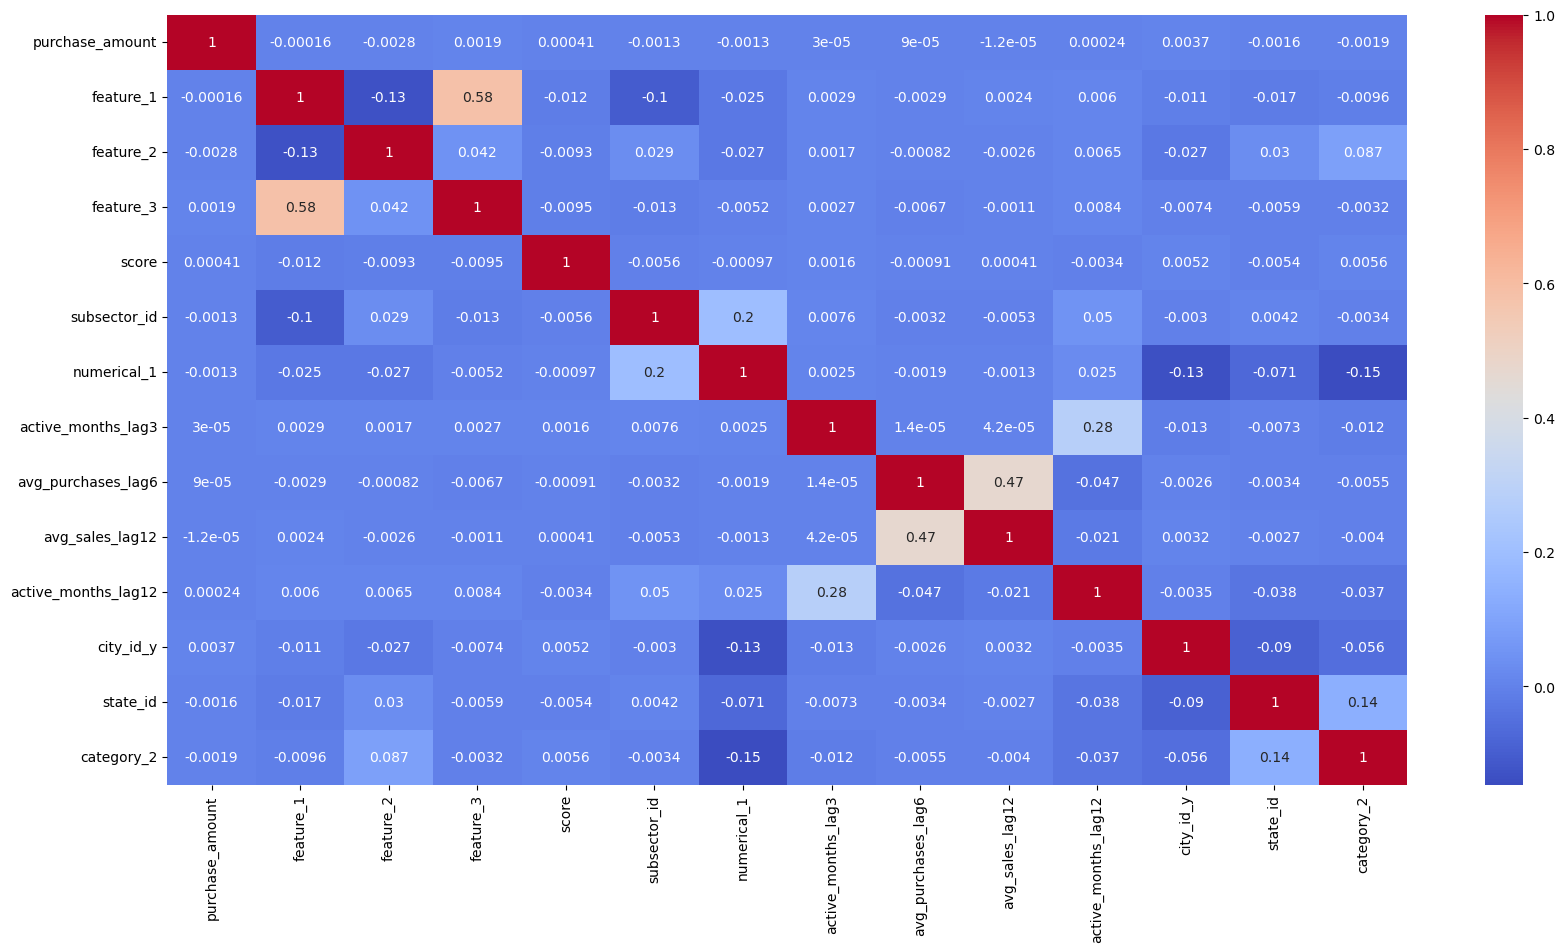

In [ ]:
import seaborn as sns 
fig, ax = plt.subplots(figsize=(20, 10))
# Calculate the correlation matrix
corr = df_draw.corr()
# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
# get information about final table
final_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147535 entries, 0 to 147534
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   purchase_amount              147535 non-null  float64       
 1   purchase_date                147535 non-null  datetime64[ns]
 2   first_active_month           147535 non-null  object        
 3   feature_1                    147535 non-null  int64         
 4   feature_2                    147535 non-null  int64         
 5   feature_3                    147535 non-null  int64         
 6   score                        147535 non-null  float64       
 7   subsector_id                 147535 non-null  int64         
 8   numerical_1                  147535 non-null  float64       
 9   most_recent_sales_range      147535 non-null  object        
 10  most_recent_purchases_range  147535 non-null  object        
 11  active_months_lag3        

**Check Duplication** 

In [ ]:
duplicates = final_table.duplicated().sum()
print(duplicates)

42


**Drop Duplication** 

In [ ]:
# Drop duplicates
final_table = final_table.drop_duplicates()

In [ ]:
# check duplicates after dopping all duplicates
duplicates = final_table.duplicated().sum()
print(duplicates)

0


In [ ]:
final_table.head()

,purchase_amount,purchase_date,first_active_month,feature_1,feature_2,feature_3,score,subsector_id,numerical_1,most_recent_sales_range,most_recent_purchases_range,active_months_lag3,avg_purchases_lag6,avg_sales_lag12,active_months_lag12,category_4,city_id_y,state_id,category_2
0,-78.173565,2017-02-14 14:00:43,Feb-17,5,1,1,0.134077,19,-0.047556,D,D,3,0.959246,1.02,12,N,-1,2,3.0
1,-49.710466,2017-01-05 18:27:18,Dec-16,5,2,1,-33.219281,19,-0.047556,D,D,3,0.959246,1.02,12,N,-1,2,3.0
2,-35.333881,2017-01-14 16:16:01,Jul-16,2,2,0,0.884295,33,0.388700,A,A,3,1.087142,0.95,12,Y,137,19,3.0
3,-44.721333,2017-11-01 00:00:00,Oct-17,3,1,1,-0.293427,33,0.388700,A,A,3,1.087142,0.95,12,Y,137,19,3.0
4,-221.871315,2017-03-21 17:08:17,Mar-17,4,1,0,-0.100774,33,0.388700,A,A,3,1.087142,0.95,12,Y,137,19,3.0


**Avoid Noise consistency by convert all object datatype into lowercase** 

In [ ]:
# Get the categorical columns
categorical_columns = final_table.select_dtypes(include='object').columns

# Convert all categorical data to lowercase
for column in categorical_columns:
    final_table[column] = final_table[column].str.lower()

In [ ]:
final_table.head()

,purchase_amount,purchase_date,first_active_month,feature_1,feature_2,feature_3,score,subsector_id,numerical_1,most_recent_sales_range,most_recent_purchases_range,active_months_lag3,avg_purchases_lag6,avg_sales_lag12,active_months_lag12,category_4,city_id_y,state_id,category_2
0,-78.173565,2017-02-14 14:00:43,feb-17,5,1,1,0.134077,19,-0.047556,d,d,3,0.959246,1.02,12,n,-1,2,3.0
1,-49.710466,2017-01-05 18:27:18,dec-16,5,2,1,-33.219281,19,-0.047556,d,d,3,0.959246,1.02,12,n,-1,2,3.0
2,-35.333881,2017-01-14 16:16:01,jul-16,2,2,0,0.884295,33,0.388700,a,a,3,1.087142,0.95,12,y,137,19,3.0
3,-44.721333,2017-11-01 00:00:00,oct-17,3,1,1,-0.293427,33,0.388700,a,a,3,1.087142,0.95,12,y,137,19,3.0
4,-221.871315,2017-03-21 17:08:17,mar-17,4,1,0,-0.100774,33,0.388700,a,a,3,1.087142,0.95,12,y,137,19,3.0


# Question 4 :

we can check the normality of target variable 'score' graphically using "QQ plot"

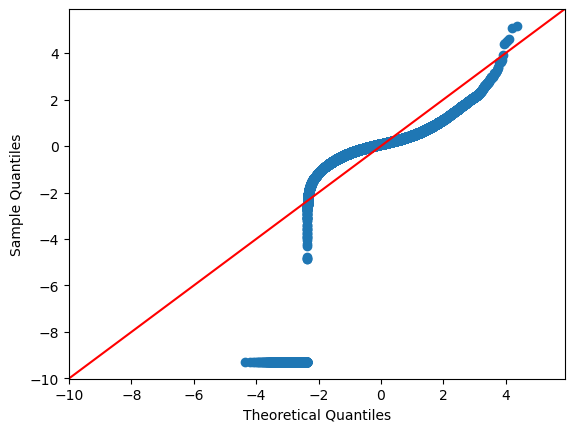

In [ ]:
# QQ plot
# create Q-Q plot with 45-degree line added to plot
import statsmodels.api as sm
fig = sm.qqplot(final_table['score'], line='45', fit = True)
plt.show()

the QQ plot is showing that the distribution of score is not normal. The QQ plot is curved, which indicates that the distribution of score is skewed.

we can check the normality of target variable score statistically using "Shapiro-wilk test" and "D’Agostino-Pearson’s K² test"

In [ ]:
# seems that score does not follow normal distribution
# Shapiro-wilk test
w, pvalue = stats.shapiro(final_table['score']) 
# p-value obtained from the Shapiro-Wilk test is significant (p < 0.05), we conclude that the data is not normally distribute
print("the value of p-value = {:g}".format(pvalue))

the value of p-value = 0


In [ ]:
# D’Agostino-Pearson’s K² test
k2, p = stats.normaltest(final_table['score'])
alpha = 1e-3
print("the value of p-value = {:g}".format(p))
p = 8.4713e-19
if p < alpha:  
    print("The null hypothesis will be rejected")
else:
    print("The null hypothesis will not be rejected")

the value of p-value = 0
The null hypothesis will be rejected


- from previous statistical tests,The null hypothesis will be rejected and the score not normal distributed

# Question 5 :

**two hypothesis tests**

**Hypothesis Test 1:**

**1- There is a relationship between user loyalty score and purchase amount  ?**

**Null Hypothesis:** There is no relationship between user loyalty score and purchase amount.

**Alternative Hypothesis:** There is a relationship between user loyalty score and purchase amount

- this hypothesis is important ,because help us to detect if  there is relation between purchase amount and score 

In [ ]:
# Get two column of "user loyalty score", "purchase amount"
loyalty_score = final_table.loc[:, 'score']
purchase_amount = final_table.loc[:, 'purchase_amount']

# Calculate the p-value,t_statistic using mannwhitneyu test 
t_statistic,p_value=stats.mannwhitneyu(x=loyalty_score,y=purchase_amount,alternative = 'two-sided')

# Print the results.
print('Mann-Whitney U statistic:', t_statistic)
print('p-value:', p_value)

Mann-Whitney U statistic: 20858264296.0
p-value: 0.0


In [ ]:
# If the p-value is less than or equal the significance level, we can reject the null hypothesis 
# If the p-value is greater than the significance level, we can accept the null hypothesis
significance_level = 0.05
if p_value <= significance_level:
    print('Reject the null hypothesis.')
else:
    print('Do not reject the null hypothesis.')

Reject the null hypothesis.


**based on the result, I Will Reject the null hypothesis, this is mean ,  There is a relationship between user loyalty score and purchase amount**

**Hypothesis Test : 2**

**2- There is a significant relationship between user loyalty score and active_months_lag3?**

**Null Hypothesis:** There is no significant relationship between user loyalty score and active_months_lag3.

**Alternative Hypothesis:** There is a significant relationship between user loyalty score and active_months_lag3.

- this hypothesis is important , because help us to detect if  there are relation between purchase active_months_lag3 and score 

In [ ]:
# Get the active_months_lag3 column
active_in_past_3months= final_table['active_months_lag3']

# Get the user_loyalty_score column
loyalty_score = final_table['score']

# Calculate the p-value,t_statistic using mannwhitneyu test 
t_statistic, p_value=stats.mannwhitneyu(x=loyalty_score,y=active_in_past_3months,alternative = 'two-sided')
# Print the results.
print('Mann-Whitney U statistic:', t_statistic)
print('p-value:', p_value)

Mann-Whitney U statistic: 838689493.5
p-value: 0.0


In [ ]:
# If the p-value is less than or equal the significance level, we can reject the null hypothesis 
# If the p-value is greater than the significance level, we can accept the null hypothesis
significance_level = 0.05
if p_value <= significance_level:
    print('Reject the null hypothesis.')
else:
    print('Do not reject the null hypothesis.')

Reject the null hypothesis.


**based on the result, I Will Reject the null hypothesis ,  this is mean There is a relationship between user loyalty score and active_months_lag3**

## Before Regression Model : 

1-  Encode the Data 

2-we can check outliers

**1- Encode the Data**

In [ ]:
# !pip install category_encoders

In [ ]:
# Create a BinaryEncoder object to encode data
from category_encoders.binary import BinaryEncoder
encoder = BinaryEncoder()
# Fit the encoder to the DataFrame
encoder.fit(final_table)
# Transform the DataFrame using the `transform()` method
final_table = encoder.transform(final_table)

**2-Check Outlier**

In [ ]:
for column in final_table:
    first_quartile = final_table[column].quantile(0.25)
    third_quartile = final_table[column].quantile(0.75)
    Interquartile = third_quartile - first_quartile

    # Identify the outliers for each column
    lower= first_quartile - 1.5 * Interquartile
    upper= third_quartile + 1.5 * Interquartile
    outliers_data = final_table[column].loc[(final_table[column] < lower) | (final_table[column] > upper)]
    if any(outliers_data):
        print('{} feature'.format(column), "contain outlier")
    else:
        print('{} feature'.format(column), "not contain outlier")

purchase_amount feature contain outlier
purchase_date feature not contain outlier
first_active_month_0 feature contain outlier
first_active_month_1 feature contain outlier
first_active_month_2 feature not contain outlier
first_active_month_3 feature not contain outlier
first_active_month_4 feature not contain outlier
first_active_month_5 feature not contain outlier
first_active_month_6 feature not contain outlier
feature_1 feature not contain outlier
feature_2 feature not contain outlier
feature_3 feature not contain outlier
score feature contain outlier
subsector_id feature not contain outlier
numerical_1 feature contain outlier
most_recent_sales_range_0 feature not contain outlier
most_recent_sales_range_1 feature not contain outlier
most_recent_sales_range_2 feature not contain outlier
most_recent_purchases_range_0 feature not contain outlier
most_recent_purchases_range_1 feature not contain outlier
most_recent_purchases_range_2 feature not contain outlier
active_months_lag3 feature

**Note**

there are many outliers in data , I cannot remove outliers because outliers are many and  Removing outliers in this case will be have negative affect on the performance of model because the data will be very small  

In [ ]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147493 entries, 0 to 147534
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   purchase_amount                147493 non-null  float64       
 1   purchase_date                  147493 non-null  datetime64[ns]
 2   first_active_month_0           147493 non-null  int64         
 3   first_active_month_1           147493 non-null  int64         
 4   first_active_month_2           147493 non-null  int64         
 5   first_active_month_3           147493 non-null  int64         
 6   first_active_month_4           147493 non-null  int64         
 7   first_active_month_5           147493 non-null  int64         
 8   first_active_month_6           147493 non-null  int64         
 9   feature_1                      147493 non-null  int64         
 10  feature_2                      147493 non-null  int64         
 11  featu

In [ ]:
# get only the year from purchase date
final_table["purchase_date"] = final_table["purchase_date"].dt.year

# Question 6 :

**Create Linear Regression Model**

1- I will use linear regression model  

In [ ]:
# building the regression model
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso 

train, test = train_test_split(final_table, test_size=0.2, shuffle=True, random_state=123)

y_train = train['score']
y_test = test['score']

X_train = train.drop(['score'], axis=1)
X_test  = test.drop(['score'], axis=1) 

###########################################################

model = linear_model.LinearRegression()
print(model)

LinearRegression()


2- I select the features after cleaning and encoding it, then use these features in Linear  regression model 

**These features are :** 

In [ ]:
final_table.columns

Index(['purchase_amount', 'purchase_date', 'first_active_month_0',
       'first_active_month_1', 'first_active_month_2', 'first_active_month_3',
       'first_active_month_4', 'first_active_month_5', 'first_active_month_6',
       'feature_1', 'feature_2', 'feature_3', 'score', 'subsector_id',
       'numerical_1', 'most_recent_sales_range_0', 'most_recent_sales_range_1',
       'most_recent_sales_range_2', 'most_recent_purchases_range_0',
       'most_recent_purchases_range_1', 'most_recent_purchases_range_2',
       'active_months_lag3', 'avg_purchases_lag6', 'avg_sales_lag12',
       'active_months_lag12', 'category_4_0', 'category_4_1', 'city_id_y',
       'state_id', 'category_2'],
      dtype='object')

# Question 7 :

###  No multicollinearity exists in selected features because I drop features that has high correlation with another features during cleaning data 

<Axes: >

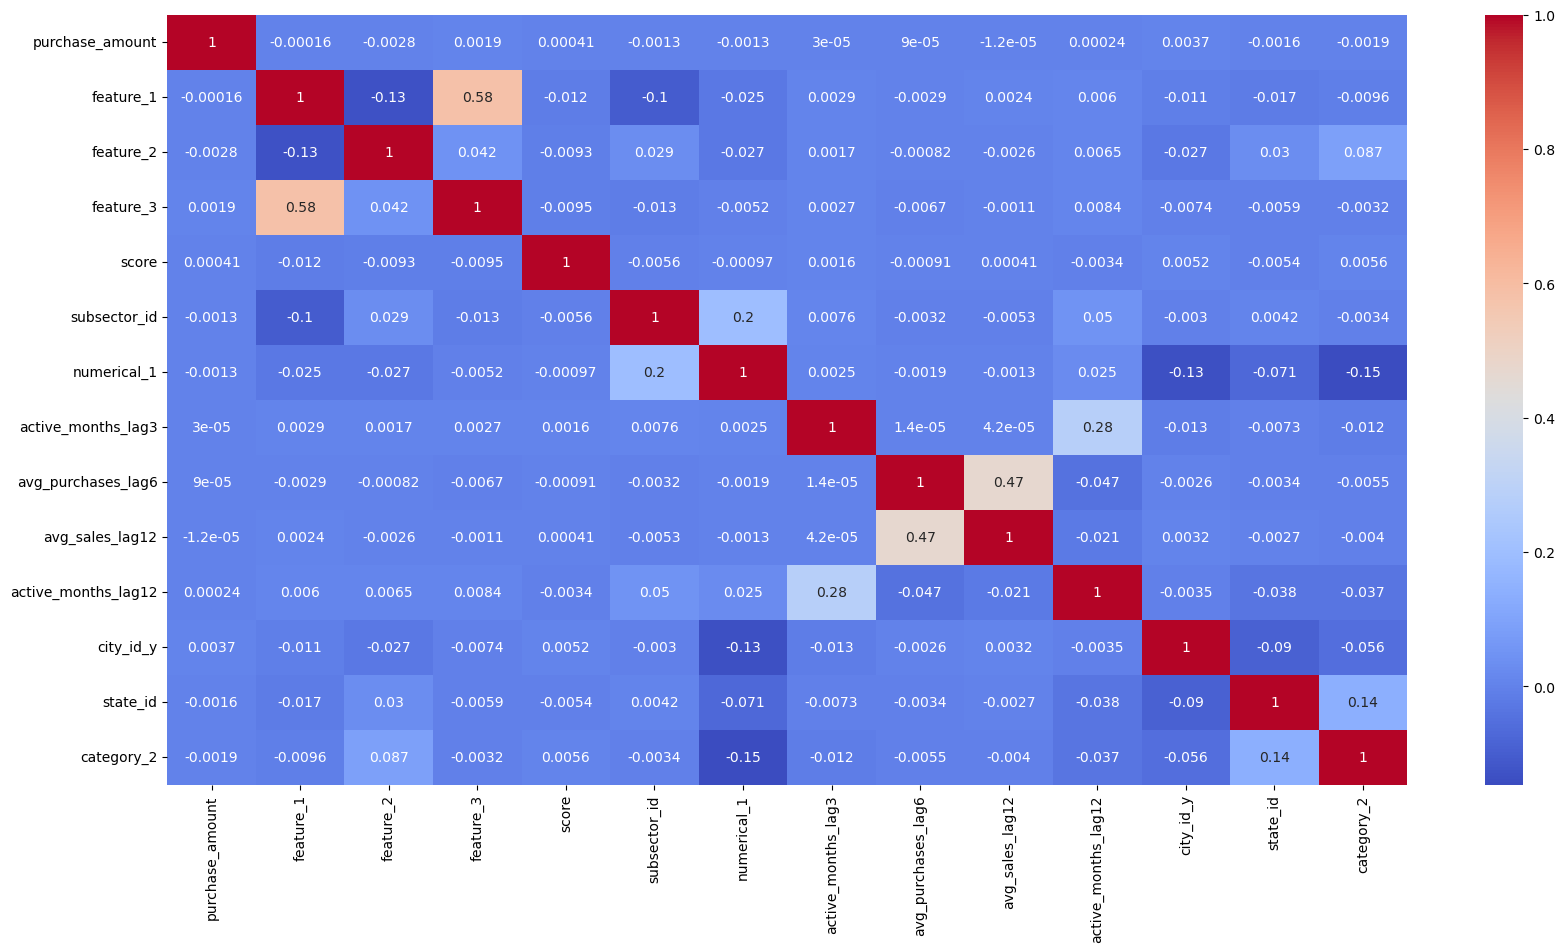

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
# Calculate the correlation matrix
corr = df_draw.corr()
# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Question 8 :

Trial 1 : 

**Train and Test Linear Regression Model**

In [ ]:
# train model
model.fit(X_train,y_train)
# make prediction
y_predict_train=model.predict(X_train)
# Compute Root mean squared error of the predictions on train data
rmse = np.sqrt(mean_squared_error(y_train, y_predict_train))
print(f"Root Mean Squared Error for training : {rmse}")
# make prediction on test data
y_predict_test=model.predict(X_test)
# Compute Root mean squared error of the predictions on test data
rmse = np.sqrt(mean_squared_error(y_test, y_predict_test))
print(f"Root Mean Squared Error for testing : {rmse}")

Root Mean Squared Error for training : 3.5413997436877667
Root Mean Squared Error for testing : 3.523398275326276


**The Result**

Root Mean Squared Error for traning : **3.5413997436877667**

Root Mean Squared Error for testing : **3.523398275326276**

**Trial 2 :**

**Train and Test using Ridge**

In [ ]:
# With Ridge 
lambda_list_ridge = list(np.linspace(20, 25, 101))
model_ridge = Ridge(alpha=lambda_list_ridge[0])
model_ridge.fit(X_train,y_train)
# make prediction
y_predict_train=model_ridge.predict(X_train)
# Compute Root mean squared error of the predictions on train data
rmse = np.sqrt(mean_squared_error(y_train, y_predict_train))
print(f"Root Mean Squared Error for training : {rmse}")
# make prediction on test data
y_predict_test=model.predict(X_test)
# Compute Root mean squared error of the predictions on test data
rmse = np.sqrt(mean_squared_error(y_test, y_predict_test))
print(f"Root Mean Squared Error for testing : {rmse}")

Root Mean Squared Error for training : 3.5414088149862417
Root Mean Squared Error for testing : 3.523398275326276


**The Result**

Root Mean Squared Error for traning : **3.5414088149862417**

Root Mean Squared Error for testing : **3.523398275326276**